# **CNN on MNIST dataset-**

**Importing the libraries-**

In [1]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Downloading the data-**

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**splitting the data into test, train and validation dataset-**

In [3]:
mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_testset, [int(0.9 * len(mnist_testset)), int(0.1 * len(mnist_testset))])

**Shuffling and creating batches of data-**

In [4]:
train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=64, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

In [5]:
print("Training dataset size: ", len(mnist_trainset))
print("Validation dataset size: ", len(mnist_valset))
print("Testing dataset size: ", len(mnist_testset))

Training dataset size:  60000
Validation dataset size:  9000
Testing dataset size:  1000


**Visualising the data-**

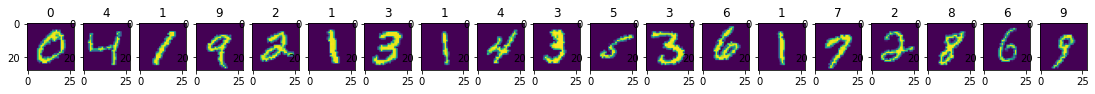

In [ ]:
# visualize data
fig=plt.figure(figsize=(20, 10))
for i in range(1, 20):
    img = transforms.ToPILImage(mode='L')(mnist_trainset[i][0])
    fig.add_subplot(1, 20, i)
    plt.title(mnist_trainset[i][1])
    plt.imshow(img)
plt.show()

In [6]:
def TabularFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)
  return pd.DataFrame(list(zip(ep,train_cost,train_acc,eval_cost,eval_acc)),columns = ['Epoch Value','Training Loss','Training Accuracy','Validation loss','Validation Accuracy'])

In [7]:
def TabularFormatTesting(epochs,train_cost,train_acc,test_cost,test_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)
  return pd.DataFrame(list(zip(ep,train_cost,train_acc,test_cost,test_acc)),columns = ['Epoch Value','Training Loss','Training Accuracy','Testing loss','Testing Accuracy'])

In [8]:
def GraphicalFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)

  plt.figure(figsize =(12,7))
  plt.plot(ep,eval_cost,label = "Evaluation Loss")
  plt.plot(ep,train_cost,label = "Training Loss")
  plt.ylabel("Loss",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between value of Trainig and Validation Loss V/s Epochs",fontsize = 15)
  plt.show()
  print("\n\n__________________________________________________\n\n")
  plt.figure(figsize =(12,7))
  plt.plot(ep,train_acc,label = "Training Accuracy")
  plt.plot(ep,eval_acc,label = "Evaluation Accuracy")
  plt.ylabel("Accuracy",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between Trainig and Validation Accuracies V/s Epochs",fontsize = 15)
  plt.show()

In [9]:
def GraphicalFormatTesting(epochs,train_cost,train_acc,test_cost,test_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)

  plt.figure(figsize =(12,7))
  plt.plot(ep,test_cost,label = "Testing Loss")
  plt.plot(ep,train_cost,label = "Training Loss")
  plt.ylabel("Loss",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between value of Trainig and Testing Loss V/s Epochs",fontsize = 15)
  plt.show()
  print("\n\n__________________________________________________\n\n")
  plt.figure(figsize =(12,7))
  plt.plot(ep,train_acc,label = "Training Accuracy")
  plt.plot(ep,test_acc,label = "Testing Accuracy")
  plt.ylabel("Accuracy",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between Trainig and Testing Accuracies V/s Epochs",fontsize = 15)
  plt.show()

### **This will be the CNN architecture that we will implement-**

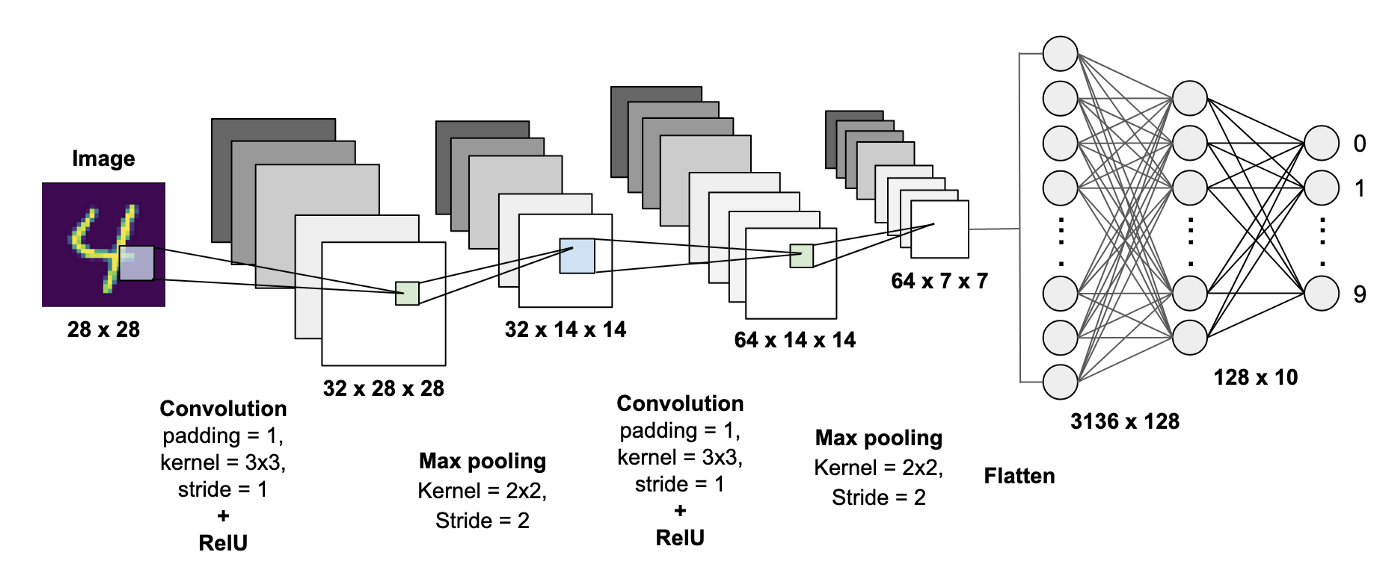

### **Defing the CNN-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=3136, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([32, 1, 3, 3])
conv_1.bias 	 torch.Size([32])
conv_2.weight 	 torch.Size([64, 32, 3, 3])
conv_2.bias 	 torch.Size([64])
linear_1.weight 	 torch.Size([128, 3136])
linear_1.bias 	 torch.Size([128])
linear_2.weight 	 torch.Size([10, 128])
linear_2.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'm

# **Training**

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 0.82990184,Train Accuracy: 0.78218333, Val Loss: 0.23912546, Val Accuracy: 0.93133333
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.23912546

Epoch: 2/100, Train Loss: 0.19593576,Train Accuracy: 0.94208333, Val Loss: 0.13518165, Val Accuracy: 0.96100000
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.13518165

Epoch: 3/100, Train Loss: 0.12816503,Train Accuracy: 0.96293333, Val Loss: 0.10271153, Val Accuracy: 0.96977778
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.10271153

Epoch: 4/100, Train Loss: 0.09928190,Train Accuracy: 0.97036667, Val Loss: 0.09359601, Val Accuracy: 0.97188889
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.09359601

Epoch: 5/100, Train Loss: 0.08334068,Train Accuracy: 0.97520000, Val Loss: 0.06809884, Val Accuracy: 0.97933333
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.06809884

Epoch: 6/100, Train Loss: 0.072051

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

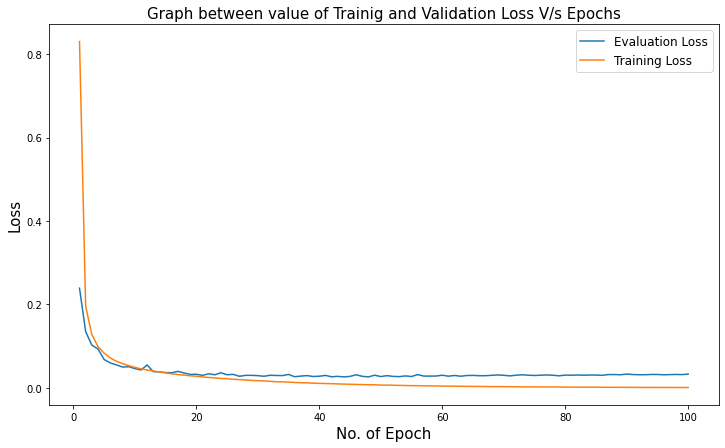



__________________________________________________




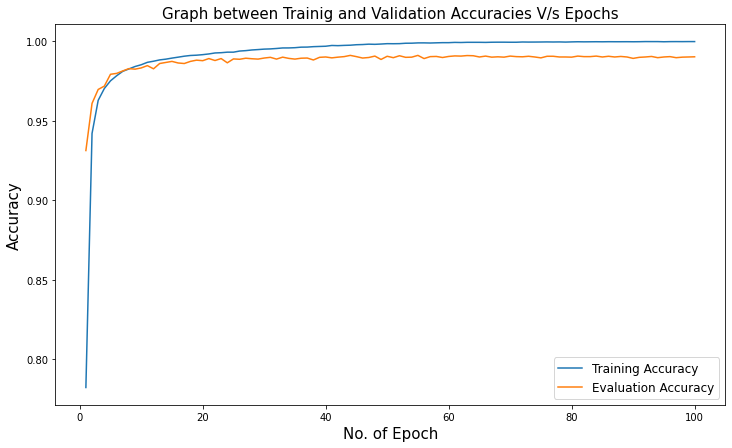

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

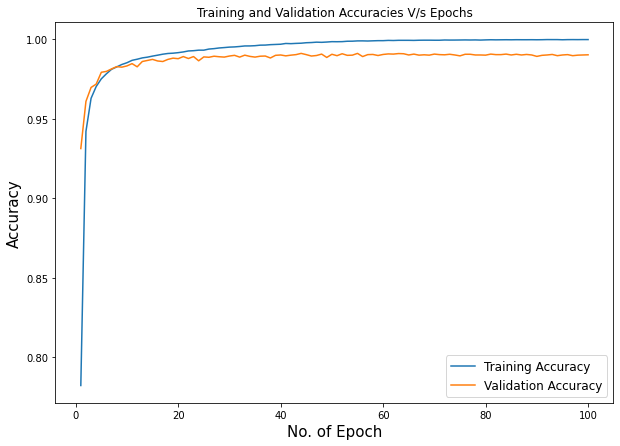

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, no_epochs + 1),train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1, no_epochs + 1),val_accuracy, label="Validation Accuracy")
plt.ylabel("Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend(fontsize = 12,loc='best')
plt.title("Training and Validation Accuracies V/s Epochs")
plt.show()

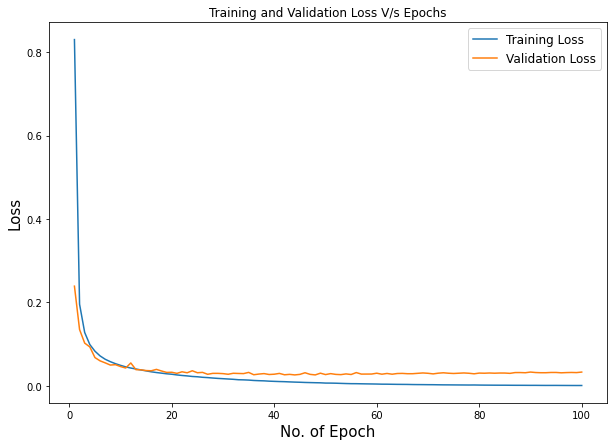

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, no_epochs + 1),train_loss, label="Training Loss")
plt.plot(np.arange(1, no_epochs + 1),val_loss, label="Validation Loss")
plt.ylabel("Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend(fontsize = 12,loc='best')
plt.title("Training and Validation Loss V/s Epochs")
plt.show()

# **Doing Experimentation on CNN-**

**Chnaged the pooling from MAXPOOL to AVGPOOL-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear_1): Linear(in_features=3136, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([32, 1, 3, 3])
conv_1.bias 	 torch.Size([32])
conv_2.weight 	 torch.Size([64, 32, 3, 3])
conv_2.bias 	 torch.Size([64])
linear_1.weight 	 torch.Size([128, 3136])
linear_1.bias 	 torch.Size([128])
linear_2.weight 	 torch.Size([10, 128])
linear_2.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': N

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 1.09329305,Train Accuracy: 0.65966667, Val Loss: 0.46685023, Val Accuracy: 0.84455556
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.46685023

Epoch: 2/100, Train Loss: 0.36775505,Train Accuracy: 0.88513333, Val Loss: 0.30425740, Val Accuracy: 0.90555556
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.30425740

Epoch: 3/100, Train Loss: 0.28141830,Train Accuracy: 0.91296667, Val Loss: 0.21892247, Val Accuracy: 0.93466667
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.21892247

Epoch: 4/100, Train Loss: 0.22519348,Train Accuracy: 0.93071667, Val Loss: 0.18765085, Val Accuracy: 0.93988889
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.18765085

Epoch: 5/100, Train Loss: 0.18714661,Train Accuracy: 0.94336667, Val Loss: 0.16680286, Val Accuracy: 0.94977778
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.16680286

Epoch: 6/100, Train Loss: 0.159268

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,1.093293,0.659667,0.466850,0.844556
1,2,0.367755,0.885133,0.304257,0.905556
2,3,0.281418,0.912967,0.218922,0.934667
3,4,0.225193,0.930717,0.187651,0.939889
4,5,0.187147,0.943367,0.166803,0.949778
...,...,...,...,...,...
95,96,0.007881,0.997967,0.041050,0.988444
96,97,0.007659,0.997933,0.042934,0.987667
97,98,0.007123,0.998400,0.040516,0.988222
98,99,0.007126,0.998317,0.043703,0.987556


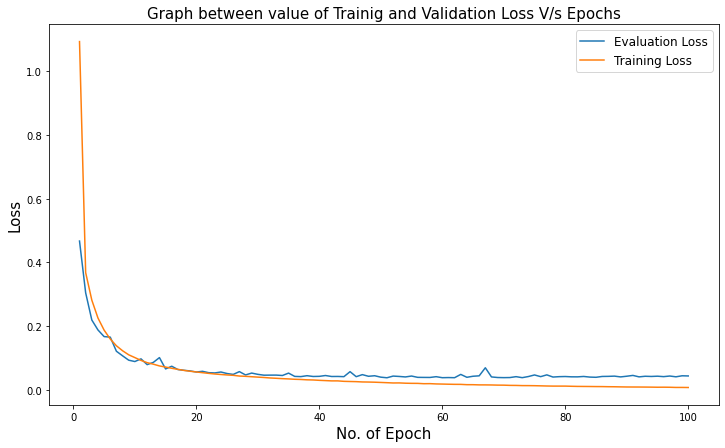



__________________________________________________




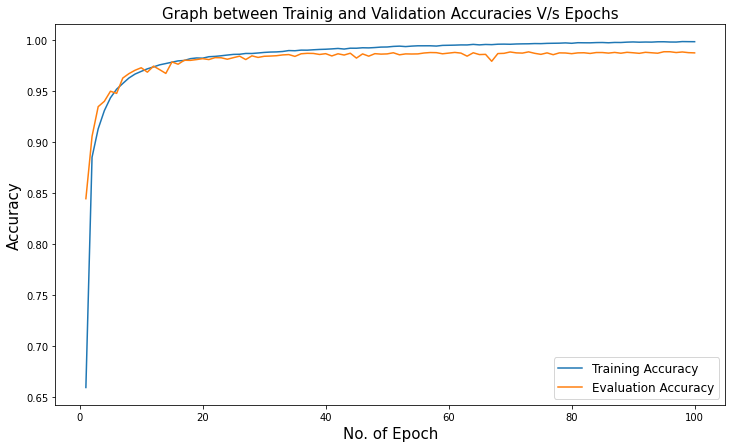

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Changed the kernel size from** $\textbf{3*3}$ **to** $\textbf{5*5}$-

**We have to change the padding from 1 to 2**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.max_pool2d = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv_2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (max_pool2d): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear_1): Linear(in_features=3136, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([32, 1, 5, 5])
conv_1.bias 	 torch.Size([32])
conv_2.weight 	 torch.Size([64, 32, 5, 5])
conv_2.bias 	 torch.Size([64])
linear_1.weight 	 torch.Size([128, 3136])
linear_1.bias 	 torch.Size([128])
linear_2.weight 	 torch.Size([10, 128])
linear_2.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': N

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 1.00372538,Train Accuracy: 0.70410000, Val Loss: 0.39492520, Val Accuracy: 0.87233333
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.39492520

Epoch: 2/100, Train Loss: 0.28778484,Train Accuracy: 0.91258333, Val Loss: 0.23329907, Val Accuracy: 0.92788889
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.23329907

Epoch: 3/100, Train Loss: 0.20552319,Train Accuracy: 0.93706667, Val Loss: 0.16367274, Val Accuracy: 0.95122222
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.16367274

Epoch: 4/100, Train Loss: 0.15924310,Train Accuracy: 0.95143333, Val Loss: 0.12482558, Val Accuracy: 0.96155556
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.12482558

Epoch: 5/100, Train Loss: 0.12875474,Train Accuracy: 0.96025000, Val Loss: 0.13147670, Val Accuracy: 0.95766667

Epoch: 6/100, Train Loss: 0.10825074,Train Accuracy: 0.96775000, Val Loss: 0.09926556, Val Accuracy: 0.96922222
Sa

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,1.003725,0.704100,0.394925,0.872333
1,2,0.287785,0.912583,0.233299,0.927889
2,3,0.205523,0.937067,0.163673,0.951222
3,4,0.159243,0.951433,0.124826,0.961556
4,5,0.128755,0.960250,0.131477,0.957667
...,...,...,...,...,...
95,96,0.004219,0.999100,0.037229,0.990222
96,97,0.004106,0.999183,0.036269,0.990000
97,98,0.004234,0.998900,0.036780,0.990000
98,99,0.003839,0.999200,0.036527,0.990444


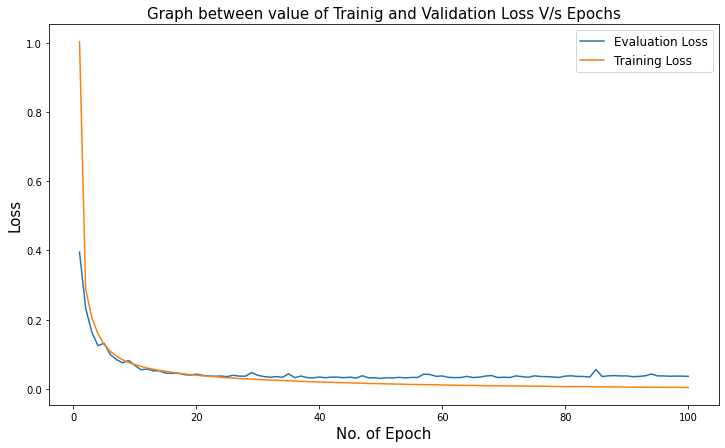



__________________________________________________




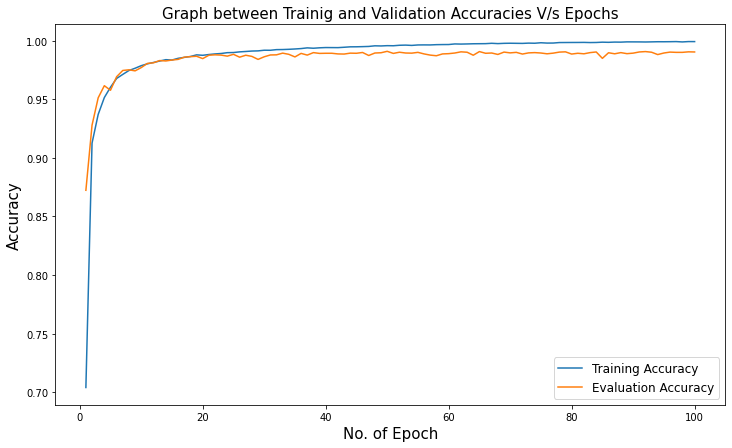

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Changed the Number of filters in 1st Conv. layer from 32 to 64 and in 2nd layer from 64 to 128-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 128, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=6272, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([64, 1, 3, 3])
conv_1.bias 	 torch.Size([64])
conv_2.weight 	 torch.Size([128, 64, 3, 3])
conv_2.bias 	 torch.Size([128])
linear_1.weight 	 torch.Size([128, 6272])
linear_1.bias 	 torch.Size([128])
linear_2.weight 	 torch.Size([10, 128])
linear_2.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False,

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 0.67105529,Train Accuracy: 0.82743333, Val Loss: 0.22991145, Val Accuracy: 0.93044444
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.22991145

Epoch: 2/100, Train Loss: 0.17658107,Train Accuracy: 0.94775000, Val Loss: 0.12009759, Val Accuracy: 0.96366667
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.12009759

Epoch: 3/100, Train Loss: 0.11246456,Train Accuracy: 0.96703333, Val Loss: 0.08611389, Val Accuracy: 0.97411111
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.08611389

Epoch: 4/100, Train Loss: 0.08572161,Train Accuracy: 0.97505000, Val Loss: 0.07488145, Val Accuracy: 0.97877778
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.07488145

Epoch: 5/100, Train Loss: 0.07170739,Train Accuracy: 0.97890000, Val Loss: 0.06726780, Val Accuracy: 0.97855556
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.06726780

Epoch: 6/100, Train Loss: 0.061758

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.671055,0.827433,0.229911,0.930444
1,2,0.176581,0.947750,0.120098,0.963667
2,3,0.112465,0.967033,0.086114,0.974111
3,4,0.085722,0.975050,0.074881,0.978778
4,5,0.071707,0.978900,0.067268,0.978556
...,...,...,...,...,...
95,96,0.001010,0.999967,0.033699,0.991222
96,97,0.001017,0.999950,0.032968,0.990556
97,98,0.000941,0.999983,0.033224,0.991000
98,99,0.000943,0.999950,0.033796,0.990778


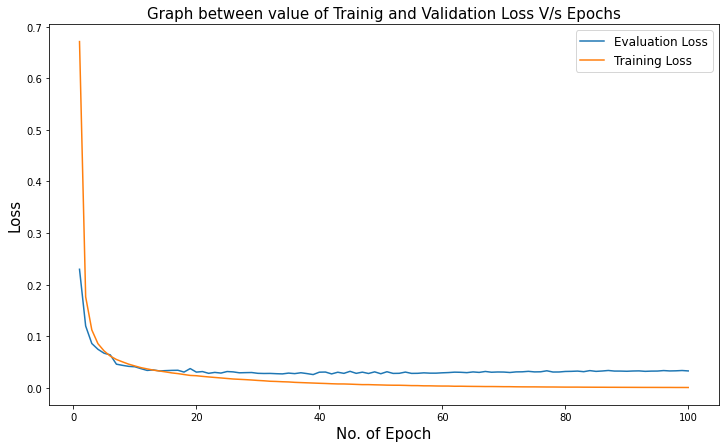



__________________________________________________




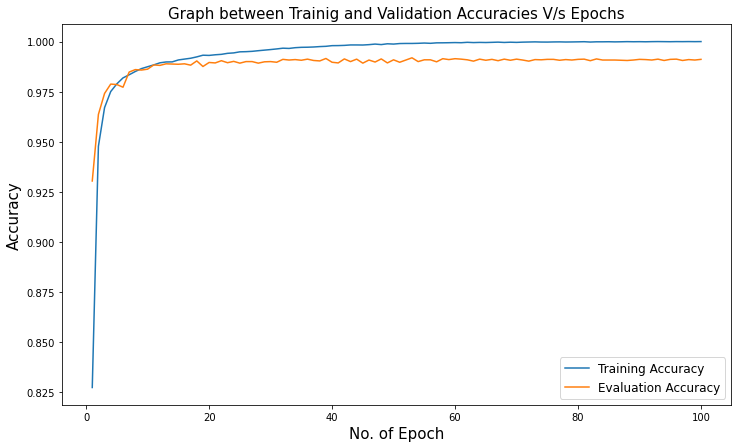

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Adding a 3rd Conv. layer with filters 256,, filter size 3, stride 2 and padding 1, with maxpooling layer of filter size 2 and stride 1-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d_1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool2d_2 = torch.nn.MaxPool2d(kernel_size=2, stride=1)
        self.linear_1 = torch.nn.Linear(6 * 6 * 256, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_3(x)
        x = self.max_pool2d_2(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max_pool2d_2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=9216, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([64, 1, 3, 3])
conv_1.bias 	 torch.Size([64])
conv_2.weight 	 torch.Size([128, 64, 3, 3])
conv_2.bias 	 torch.Size([128])
conv_3.weight 	 torch.Size([256, 128, 3, 3])
conv_3.bias 	 torch.Size([256])
linear_1.weight 	 torch.Size(

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 0.80546738,Train Accuracy: 0.77295000, Val Loss: 0.16316022, Val Accuracy: 0.95133333
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.16316022

Epoch: 2/100, Train Loss: 0.12470821,Train Accuracy: 0.96225000, Val Loss: 0.08394153, Val Accuracy: 0.97177778
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.08394153

Epoch: 3/100, Train Loss: 0.08162935,Train Accuracy: 0.97515000, Val Loss: 0.05758596, Val Accuracy: 0.98177778
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.05758596

Epoch: 4/100, Train Loss: 0.06253297,Train Accuracy: 0.98053333, Val Loss: 0.04742389, Val Accuracy: 0.98411111
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.04742389

Epoch: 5/100, Train Loss: 0.05276198,Train Accuracy: 0.98400000, Val Loss: 0.04302323, Val Accuracy: 0.98577778
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.04302323

Epoch: 6/100, Train Loss: 0.044953

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.805467,0.772950,0.163160,0.951333
1,2,0.124708,0.962250,0.083942,0.971778
2,3,0.081629,0.975150,0.057586,0.981778
3,4,0.062533,0.980533,0.047424,0.984111
4,5,0.052762,0.984000,0.043023,0.985778
...,...,...,...,...,...
95,96,0.000340,0.999967,0.031913,0.991778
96,97,0.000318,1.000000,0.031913,0.991556
97,98,0.000299,1.000000,0.031829,0.991889
98,99,0.000303,1.000000,0.031809,0.991778


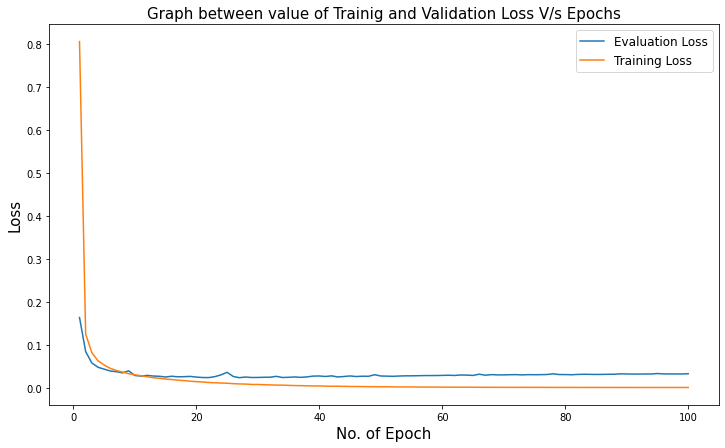



__________________________________________________




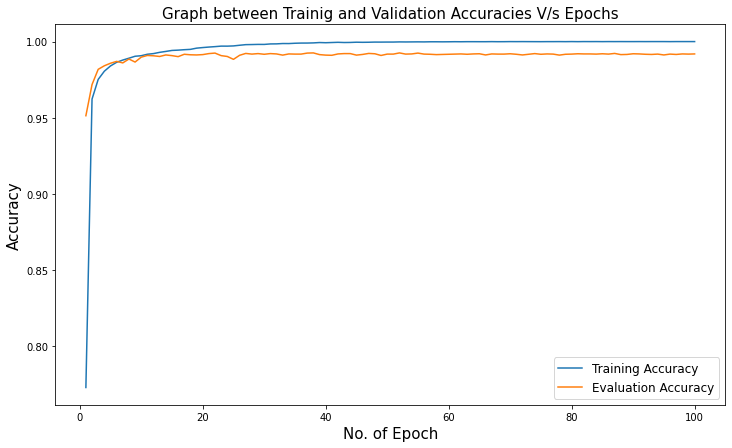

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**What if we drop the fully connected layers and use only 10 neurons for output?**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d_1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool2d_2 = torch.nn.MaxPool2d(kernel_size=2, stride=1)
        # self.linear_1 = torch.nn.Linear(6 * 6 * 256, 128)
        self.linear_2 = torch.nn.Linear(6 * 6 * 256, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_3(x)
        x = self.max_pool2d_2(x)
        x = x.reshape(x.size(0), -1)
        # x = self.linear_1(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max_pool2d_2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (linear_2): Linear(in_features=9216, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([64, 1, 3, 3])
conv_1.bias 	 torch.Size([64])
conv_2.weight 	 torch.Size([128, 64, 3, 3])
conv_2.bias 	 torch.Size([128])
conv_3.weight 	 torch.Size([256, 128, 3, 3])
conv_3.bias 	 torch.Size([256])
linear_2.weight 	 torch.Size([10, 9216])
linear_2.bias 	 torch.Size([10])
Optimizer's state_dict

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 0.45093360,Train Accuracy: 0.87535000, Val Loss: 0.11105720, Val Accuracy: 0.96688889
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.11105720

Epoch: 2/100, Train Loss: 0.10018951,Train Accuracy: 0.97050000, Val Loss: 0.07014017, Val Accuracy: 0.97766667
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.07014017

Epoch: 3/100, Train Loss: 0.07120987,Train Accuracy: 0.97806667, Val Loss: 0.05075070, Val Accuracy: 0.98466667
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.05075070

Epoch: 4/100, Train Loss: 0.05727084,Train Accuracy: 0.98300000, Val Loss: 0.04435726, Val Accuracy: 0.98577778
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.04435726

Epoch: 5/100, Train Loss: 0.04891511,Train Accuracy: 0.98523333, Val Loss: 0.06675236, Val Accuracy: 0.97855556

Epoch: 6/100, Train Loss: 0.04269684,Train Accuracy: 0.98683333, Val Loss: 0.03952297, Val Accuracy: 0.98644444
Sa

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.450934,0.875350,0.111057,0.966889
1,2,0.100190,0.970500,0.070140,0.977667
2,3,0.071210,0.978067,0.050751,0.984667
3,4,0.057271,0.983000,0.044357,0.985778
4,5,0.048915,0.985233,0.066752,0.978556
...,...,...,...,...,...
95,96,0.000555,1.000000,0.031064,0.992111
96,97,0.000556,0.999983,0.030979,0.991889
97,98,0.000543,1.000000,0.031192,0.992667
98,99,0.000544,1.000000,0.031131,0.992111


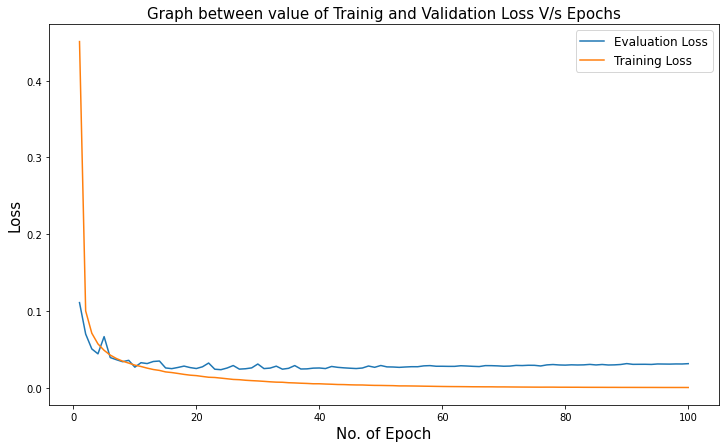



__________________________________________________




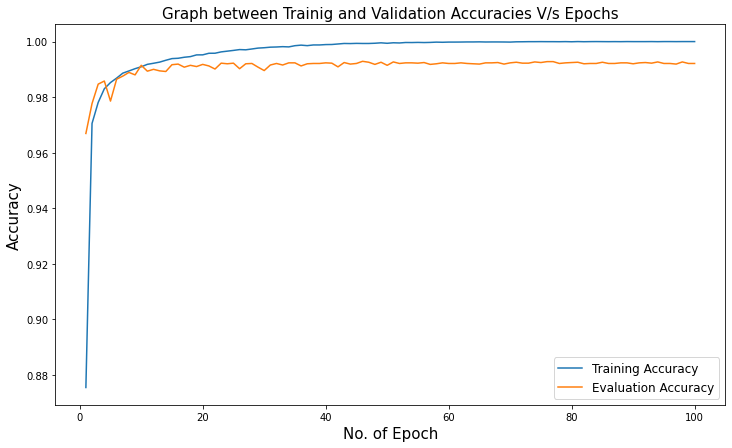

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**What if we reverse the order of Conv. layers and also add a 4rth layer?**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_4 = torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool2d_1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool2d_2 = torch.nn.MaxPool2d(kernel_size=2, stride=1)
        self.linear_1 = torch.nn.Linear(3 * 3 * 32, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_3(x)
        x = self.max_pool2d_2(x)
        x = self.conv_4(x)
        x = self.max_pool2d_1(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max_pool2d_2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=288, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([256, 1, 3, 3])
conv_1.bias 	 torch.Size([256])
conv_2.weight 	 torch.Size([128, 256, 3, 3])
conv_2.bias 	 torch.Size([128])
conv_3.weight 	 torch.Siz

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 1.40610826,Train Accuracy: 0.53798333, Val Loss: 0.37969369, Val Accuracy: 0.88222222
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.37969369

Epoch: 2/100, Train Loss: 0.15425365,Train Accuracy: 0.95315000, Val Loss: 0.09874683, Val Accuracy: 0.96933333
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.09874683

Epoch: 3/100, Train Loss: 0.09691118,Train Accuracy: 0.97001667, Val Loss: 0.06678233, Val Accuracy: 0.97855556
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.06678233

Epoch: 4/100, Train Loss: 0.07576395,Train Accuracy: 0.97630000, Val Loss: 0.11983683, Val Accuracy: 0.96022222

Epoch: 5/100, Train Loss: 0.06278309,Train Accuracy: 0.98015000, Val Loss: 0.04641031, Val Accuracy: 0.98444444
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.04641031

Epoch: 6/100, Train Loss: 0.05458232,Train Accuracy: 0.98331667, Val Loss: 0.04674612, Val Accuracy: 0.98522222

E

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,1.406108,0.537983,0.379694,0.882222
1,2,0.154254,0.953150,0.098747,0.969333
2,3,0.096911,0.970017,0.066782,0.978556
3,4,0.075764,0.976300,0.119837,0.960222
4,5,0.062783,0.980150,0.046410,0.984444
...,...,...,...,...,...
95,96,0.000313,0.999983,0.031025,0.993000
96,97,0.000311,1.000000,0.030636,0.993333
97,98,0.000321,0.999983,0.032072,0.993222
98,99,0.000298,1.000000,0.031481,0.993111


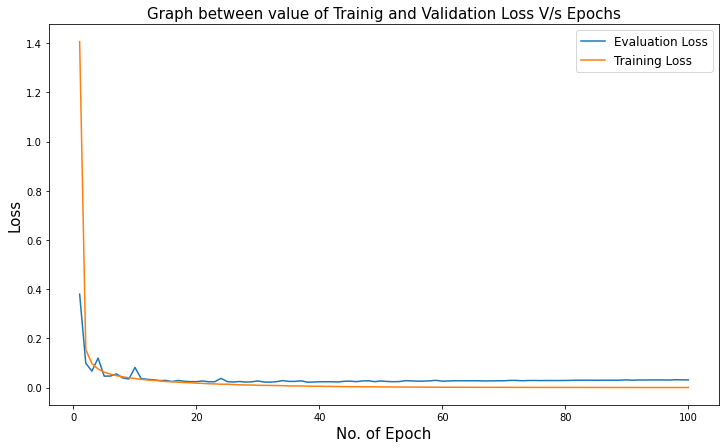



__________________________________________________




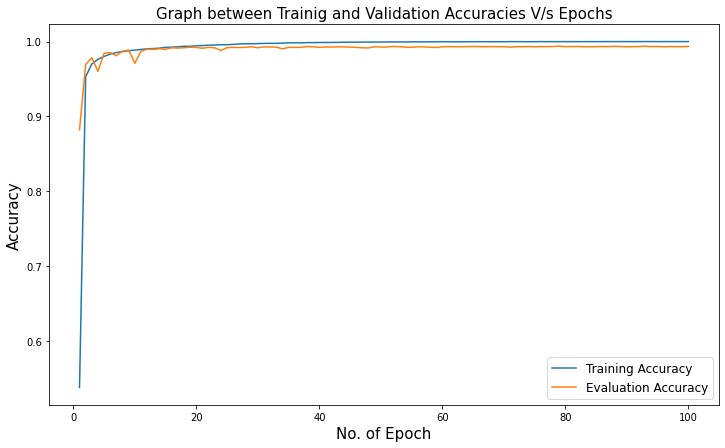

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Adding dropout-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_4 = torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool2d_1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool2d_2 = torch.nn.MaxPool2d(kernel_size=2, stride=1)
        self.linear_1 = torch.nn.Linear(3 * 3 * 32, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.05)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_3(x)
        x = self.max_pool2d_2(x)
        x = self.conv_4(x)
        x = self.max_pool2d_1(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max_pool2d_2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=288, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([256, 1, 3, 3])
conv_1.bias 	 torch.Size([256])
conv_2.weight 	 torch.Size([128, 256, 3, 3])
conv_2.bias 	 torch.Size([128])
conv_3.weight 	 torch.Si

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/100, Train Loss: 1.20881112,Train Accuracy: 0.61223333, Val Loss: 0.17977549, Val Accuracy: 0.94455556
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.17977549

Epoch: 2/100, Train Loss: 0.15474303,Train Accuracy: 0.95256667, Val Loss: 0.08804385, Val Accuracy: 0.97266667
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.08804385

Epoch: 3/100, Train Loss: 0.09862254,Train Accuracy: 0.96885000, Val Loss: 0.12388421, Val Accuracy: 0.96022222

Epoch: 4/100, Train Loss: 0.07713395,Train Accuracy: 0.97550000, Val Loss: 0.05070834, Val Accuracy: 0.98344444
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.05070834

Epoch: 5/100, Train Loss: 0.06524103,Train Accuracy: 0.97946667, Val Loss: 0.04428224, Val Accuracy: 0.98622222
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.04428224

Epoch: 6/100, Train Loss: 0.05576527,Train Accuracy: 0.98220000, Val Loss: 0.03926975, Val Accuracy: 0.98711111
Sa

In [ ]:
pd = TabularFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,1.208811,0.612233,0.179775,0.944556
1,2,0.154743,0.952567,0.088044,0.972667
2,3,0.098623,0.968850,0.123884,0.960222
3,4,0.077134,0.975500,0.050708,0.983444
4,5,0.065241,0.979467,0.044282,0.986222
...,...,...,...,...,...
95,96,0.001048,0.999783,0.025827,0.994333
96,97,0.001149,0.999733,0.027543,0.993556
97,98,0.001041,0.999733,0.026471,0.994111
98,99,0.001003,0.999750,0.030217,0.993778


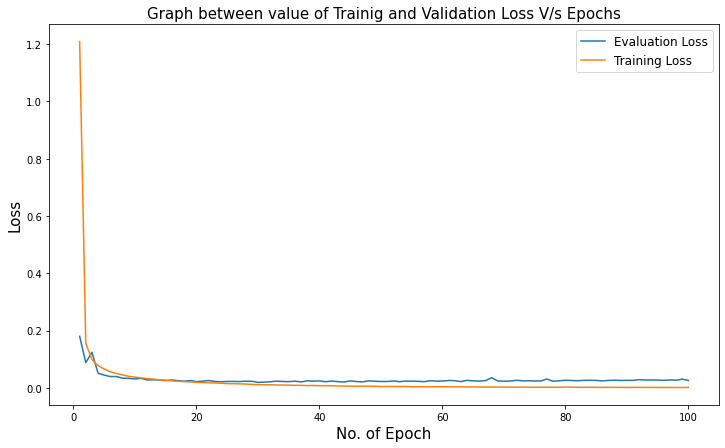



__________________________________________________




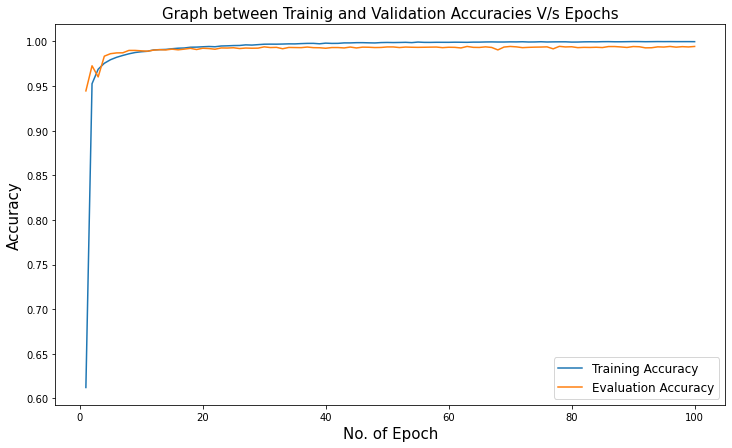

In [ ]:
GraphicalFormat(no_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

# **Basic Experimentaion-** 

**As we can see that the validation accuracy is somwhat constant after 20 epochs, so we will use only 30 epochs for furthers experimentation-**

####**Changing the different values of learning rate-**

In [ ]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []
lr = [0.01,0.05,0.1,0.5,0.8]
for i in range(len(lr)):
  print("Calculating for the value of learning rate value of  = ",lr[i],"\n")
  print(dash,"\n")
  optimizer = torch.optim.SGD(model.parameters(), lr=lr[i],momentum = 0.05, weight_decay=0)
  no_epochs = 20
  if (torch.cuda.is_available()):
      model.cuda()


  train_loss = list()
  val_loss = list()
  train_accuracy = list()
  val_accuracy = list()
  best_val_loss = 1
  for epoch in range(no_epochs):
      total_train_loss = 0
      total_val_loss = 0

      model.train()
      total_p = 0
      # training
      for itr, (image, label) in enumerate(train_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          optimizer.zero_grad()

          pred = model(image)

          loss = criterion(pred, label)
          total_train_loss += loss.item()
          #ADDED HERE
          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total_p= total_p + 1        

          loss.backward()
          optimizer.step()
      accuracy_train = (total_p / len(mnist_trainset))*100
      train_accuracy.append(accuracy_train)
      total_train_loss = total_train_loss / (itr + 1)
      train_loss.append(total_train_loss)
      train_acc_list.append(train_accuracy)
      train_loss_list.append(train_loss)

      # validation
      model.eval()
      total = 0
      for itr, (image, label) in enumerate(val_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          pred = model(image)

          loss = criterion(pred, label)
          total_val_loss += loss.item()

          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total = total + 1

      accuracy = (total / len(mnist_valset))*100
      val_accuracy.append(accuracy)

      total_val_loss = total_val_loss / (itr + 1)
      val_loss.append(total_val_loss)
      val_acc_list.append(val_accuracy)
      val_loss_list.append(val_loss)

      print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))
      

Calculating for the value of learning rate value of  =  0.01 

________________________________________________________________________

 


Epoch: 1/20, Train Loss: 0.75929075,Train Accuracy: 81.43500000, Val Loss: 0.19993453, Val Accuracy: 93.95555556

Epoch: 2/20, Train Loss: 0.16532205,Train Accuracy: 95.04000000, Val Loss: 0.12147176, Val Accuracy: 96.64444444

Epoch: 3/20, Train Loss: 0.10927723,Train Accuracy: 96.79500000, Val Loss: 0.09138256, Val Accuracy: 97.24444444

Epoch: 4/20, Train Loss: 0.08668467,Train Accuracy: 97.42333333, Val Loss: 0.07220991, Val Accuracy: 97.56666667

Epoch: 5/20, Train Loss: 0.07371009,Train Accuracy: 97.81666667, Val Loss: 0.06029841, Val Accuracy: 98.18888889

Epoch: 6/20, Train Loss: 0.06562498,Train Accuracy: 98.02166667, Val Loss: 0.05260551, Val Accuracy: 98.30000000

Epoch: 7/20, Train Loss: 0.05864849,Train Accuracy: 98.24166667, Val Loss: 0.05303603, Val Accuracy: 98.28888889

Epoch: 8/20, Train Loss: 0.05409838,Train Accuracy: 98.411666

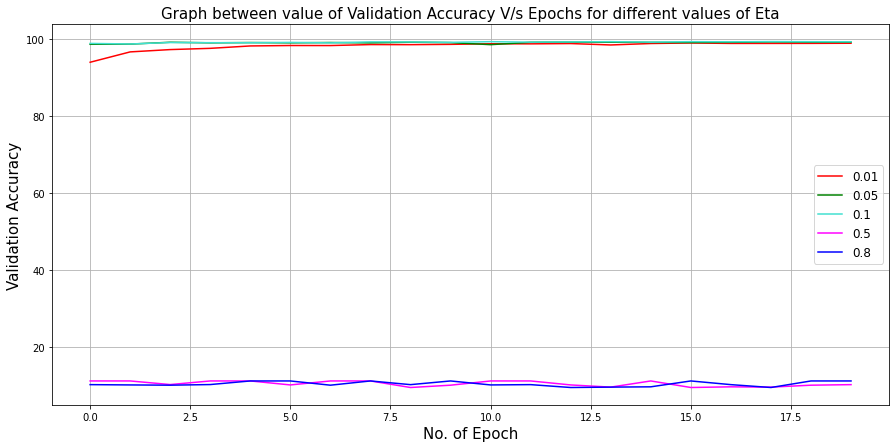



__________________________________________________




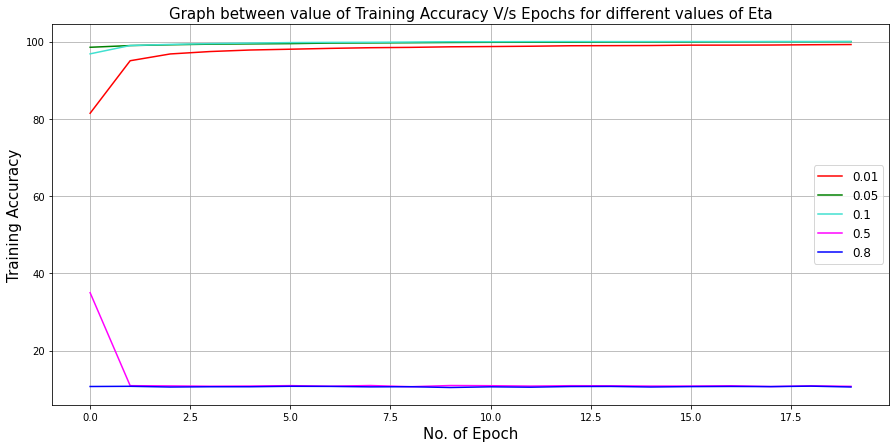

In [ ]:
plt.figure(figsize =(15,7))
colors = ['red','green','turquoise','magenta','blue']
# for i in range(len(val_acc_list)):
#     plt.plot(val_acc_list[i + no_epochs],color = colors[i] )
plt.plot(val_acc_list[0],color = 'red')
plt.plot(val_acc_list[20],color = 'green')
plt.plot(val_acc_list[40],color = 'turquoise')
plt.plot(val_acc_list[60],color = 'magenta')
plt.plot(val_acc_list[80],color = 'blue')
plt.ylabel("Validation Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(15,7))
# for i in range(len(train_acc_list)):
#     plt.plot(train_acc_list[i])
plt.plot(train_acc_list[0],color = 'red')
plt.plot(train_acc_list[20],color = 'green')
plt.plot(train_acc_list[40],color = 'turquoise')
plt.plot(train_acc_list[60],color = 'magenta')
plt.plot(train_acc_list[80],color = 'blue')
plt.ylabel("Training Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

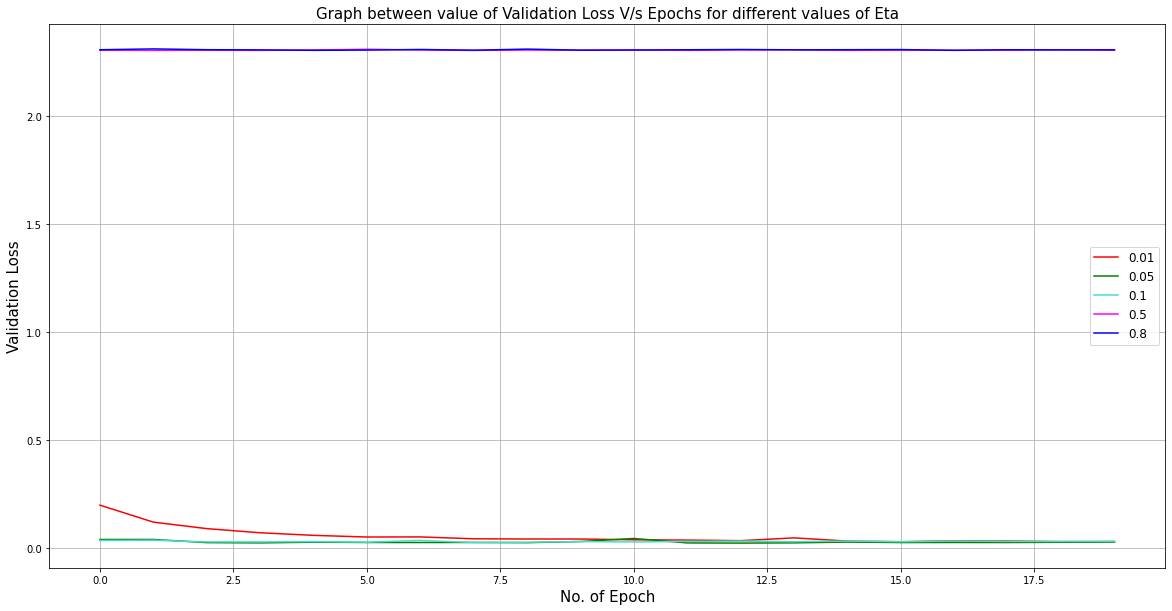



__________________________________________________




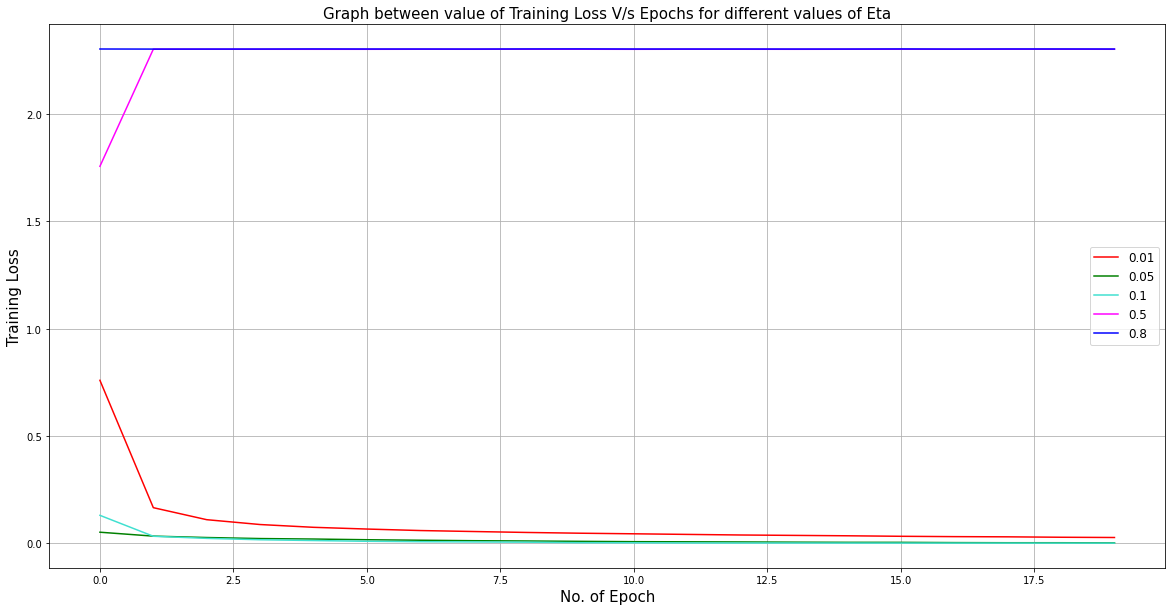

In [ ]:
plt.figure(figsize =(20,10))
# plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
# for i in range(len(val_loss_list)):
#     plt.plot(val_loss_list[i])
plt.plot(val_loss_list[0],color = 'red')
plt.plot(val_loss_list[20],color = 'green')
plt.plot(val_loss_list[40],color = 'turquoise')
plt.plot(val_loss_list[60],color = 'magenta')
plt.plot(val_loss_list[80],color = 'blue')
plt.ylabel("Validation Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(20,10))
# for i in range(len(train_loss_list)):
#     plt.plot(train_loss_list[i],label = "Training Loss")
plt.plot(train_loss_list[0],color = 'red')
plt.plot(train_loss_list[20],color = 'green')
plt.plot(train_loss_list[40],color = 'turquoise')
plt.plot(train_loss_list[60],color = 'magenta')
plt.plot(train_loss_list[80],color = 'blue')
plt.ylabel("Training Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

## **Setting the correct Indentation start** 


**For Different learning rate values-**

In [ ]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []
lr = [0.01,0.05,0.1,0.5,0.8]
for i in range(len(lr)):
  print("Calculating for the value of learning rate value of  = ",lr[i],"\n")
  print(dash,"\n")
  optimizer = torch.optim.SGD(model.parameters(), lr=lr[i],momentum = 0.05, weight_decay=0)
  no_epochs = 20
  if (torch.cuda.is_available()):
      model.cuda()


  train_loss = list()
  val_loss = list()
  train_accuracy = list()
  val_accuracy = list()
  best_val_loss = 1
  for epoch in range(no_epochs):
      total_train_loss = 0
      total_val_loss = 0

      model.train()
      total_p = 0
      # training
      for itr, (image, label) in enumerate(train_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          optimizer.zero_grad()

          pred = model(image)

          loss = criterion(pred, label)
          total_train_loss += loss.item()
          # print("Train Loss for",itr,"batch is = ",total_train_loss)
          #ADDED HERE
          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total_p= total_p + 1        

          loss.backward()
          optimizer.step()
      accuracy_train = (total_p / len(mnist_trainset))*100
      train_accuracy.append(accuracy_train)
      total_train_loss = total_train_loss / (itr + 1)
      # print("total train loss for all batches for ",epoch, "is = ",total_train_loss)
      train_loss.append(total_train_loss)
      # train_acc_list.append(train_accuracy)
      # train_loss_list.append(train_loss)

      # validation
      model.eval()
      total = 0
      for itr, (image, label) in enumerate(val_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          pred = model(image)

          loss = criterion(pred, label)
          total_val_loss += loss.item()
          # print("Val Loss for",itr,"batch is = ",total_val_loss)

          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total = total + 1

      accuracy = (total / len(mnist_valset))*100
      val_accuracy.append(accuracy)

      total_val_loss = total_val_loss / (itr + 1)
      # print("total Val loss for all batches for ",epoch, "is = ",total_val_loss)
      val_loss.append(total_val_loss)
      # val_acc_list.append(val_accuracy)
      # val_loss_list.append(val_loss)

      print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))
  train_acc_list.append(train_accuracy)
  train_loss_list.append(train_loss)
  val_acc_list.append(val_accuracy)
  val_loss_list.append(val_loss)

Calculating for the value of learning rate value of  =  0.01 

________________________________________________________________________

 


Epoch: 1/20, Train Loss: 0.78264722,Train Accuracy: 80.68333333, Val Loss: 0.23400089, Val Accuracy: 93.37777778

Epoch: 2/20, Train Loss: 0.19316971,Train Accuracy: 94.22500000, Val Loss: 0.13744827, Val Accuracy: 95.65555556

Epoch: 3/20, Train Loss: 0.12269940,Train Accuracy: 96.35000000, Val Loss: 0.09296591, Val Accuracy: 97.20000000

Epoch: 4/20, Train Loss: 0.09268361,Train Accuracy: 97.26000000, Val Loss: 0.06926820, Val Accuracy: 97.97777778

Epoch: 5/20, Train Loss: 0.07692795,Train Accuracy: 97.67666667, Val Loss: 0.06123346, Val Accuracy: 98.10000000

Epoch: 6/20, Train Loss: 0.06686901,Train Accuracy: 98.00333333, Val Loss: 0.05054609, Val Accuracy: 98.46666667

Epoch: 7/20, Train Loss: 0.05878507,Train Accuracy: 98.26166667, Val Loss: 0.04842673, Val Accuracy: 98.51111111

Epoch: 8/20, Train Loss: 0.05352129,Train Accuracy: 98.360000

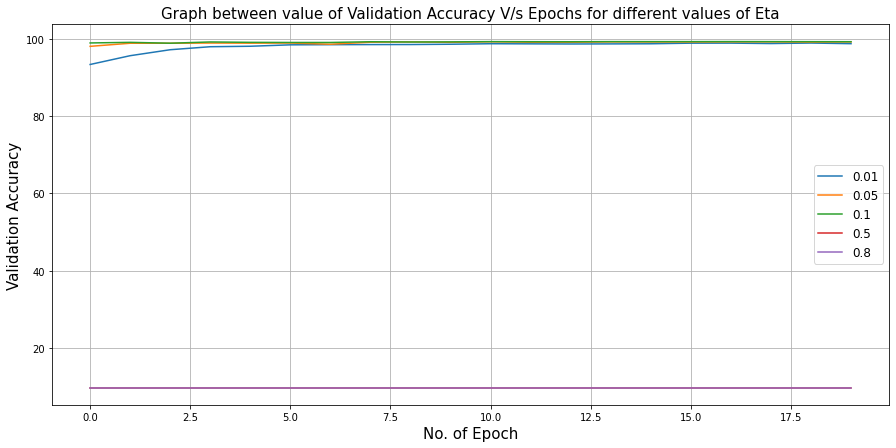



__________________________________________________




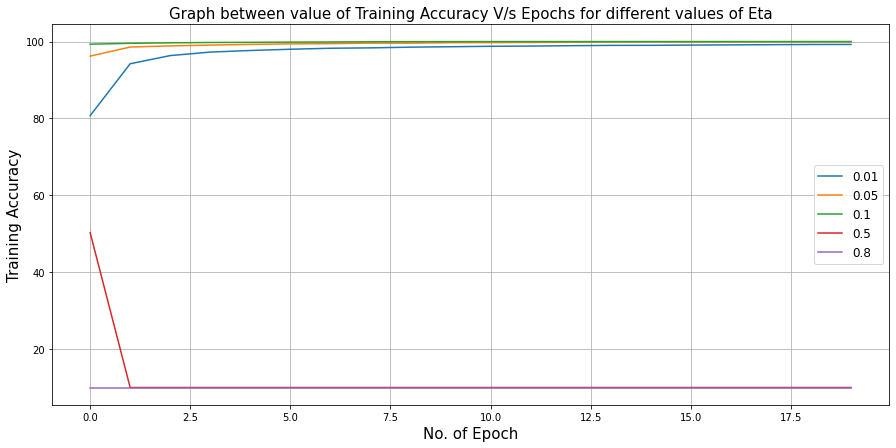

In [ ]:
plt.figure(figsize =(15,7))
colors = ['red','green','turquoise','magenta','blue']
for i in range(len(val_acc_list)):
    plt.plot(val_acc_list[i])#,color = colors[i] )
# plt.plot(val_acc_list[0],color = 'red')
# plt.plot(val_acc_list[20],color = 'green')
# plt.plot(val_acc_list[40],color = 'turquoise')
# plt.plot(val_acc_list[60],color = 'magenta')
# plt.plot(val_acc_list[80],color = 'blue')
plt.ylabel("Validation Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(15,7))
for i in range(len(train_acc_list)):
    plt.plot(train_acc_list[i])
# plt.plot(train_acc_list[0],color = 'red')
# plt.plot(train_acc_list[20],color = 'green')
# plt.plot(train_acc_list[40],color = 'turquoise')
# plt.plot(train_acc_list[60],color = 'magenta')
# plt.plot(train_acc_list[80],color = 'blue')
plt.ylabel("Training Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

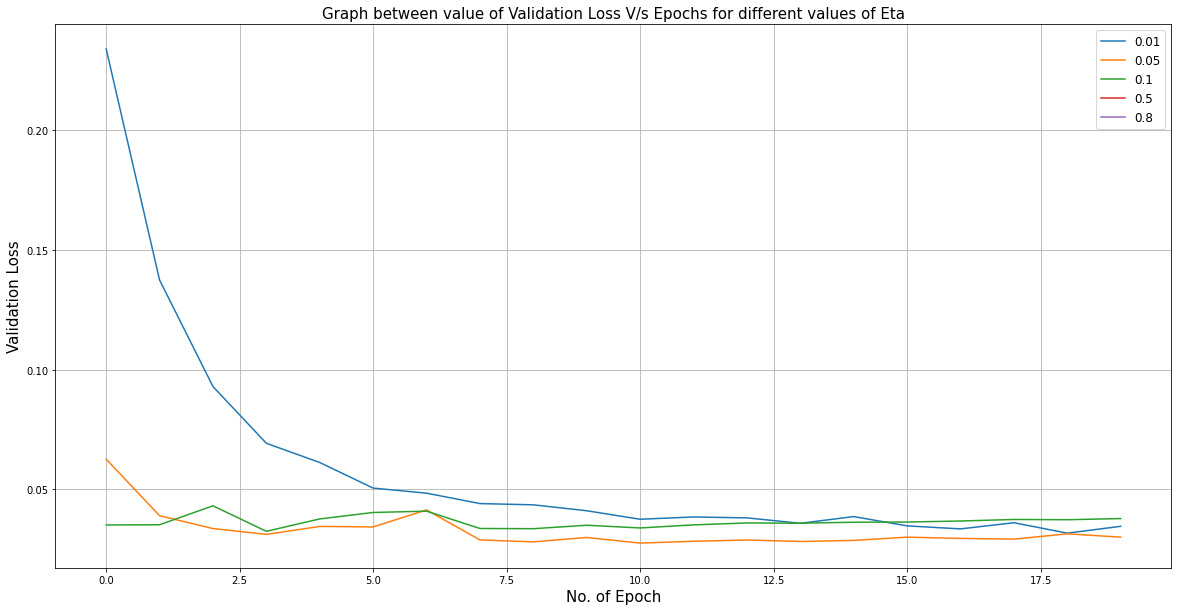



__________________________________________________




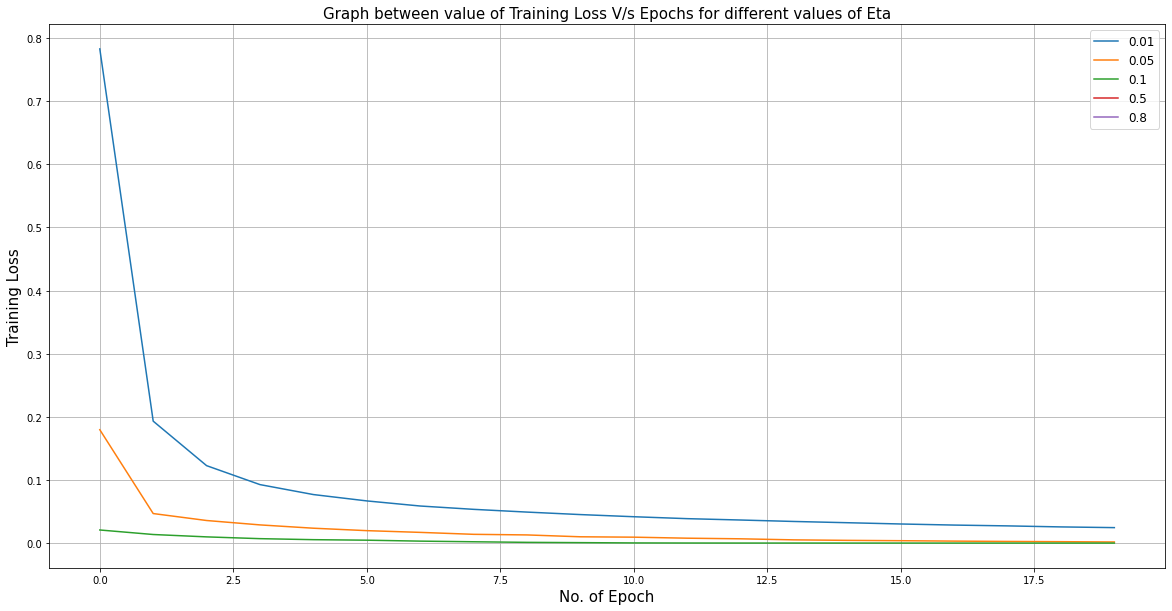

In [ ]:
plt.figure(figsize =(20,10))
# plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
for i in range(len(val_loss_list)):
    plt.plot(val_loss_list[i])
# plt.plot(val_loss_list[0],color = 'red')
# plt.plot(val_loss_list[20],color = 'green')
# plt.plot(val_loss_list[40],color = 'turquoise')
# plt.plot(val_loss_list[60],color = 'magenta')
# plt.plot(val_loss_list[80],color = 'blue')
plt.ylabel("Validation Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(20,10))
for i in range(len(train_loss_list)):
    plt.plot(train_loss_list[i],label = "Training Loss")
# plt.plot(train_loss_list[0],color = 'red')
# plt.plot(train_loss_list[20],color = 'green')
# plt.plot(train_loss_list[40],color = 'turquoise')
# plt.plot(train_loss_list[60],color = 'magenta')
# plt.plot(train_loss_list[80],color = 'blue')
plt.ylabel("Training Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

## **Setting the correct Indentation end**

**These 4 graphs below are for the same code without correct indentation. They are just for comparison when we do proper indentation.**

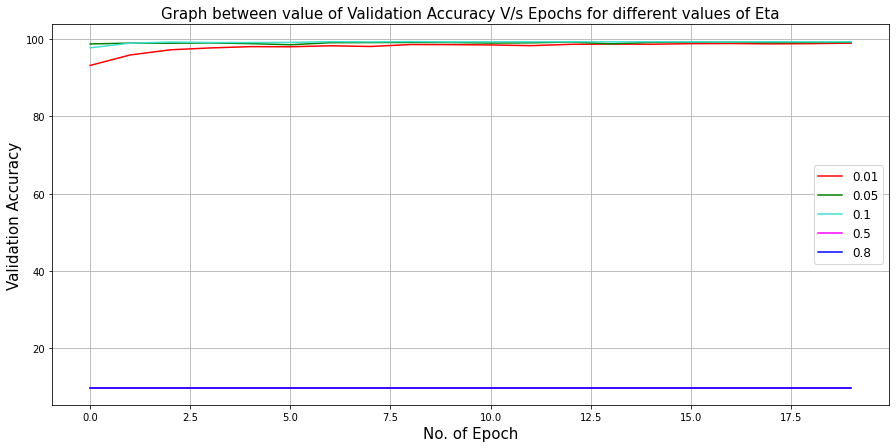



__________________________________________________




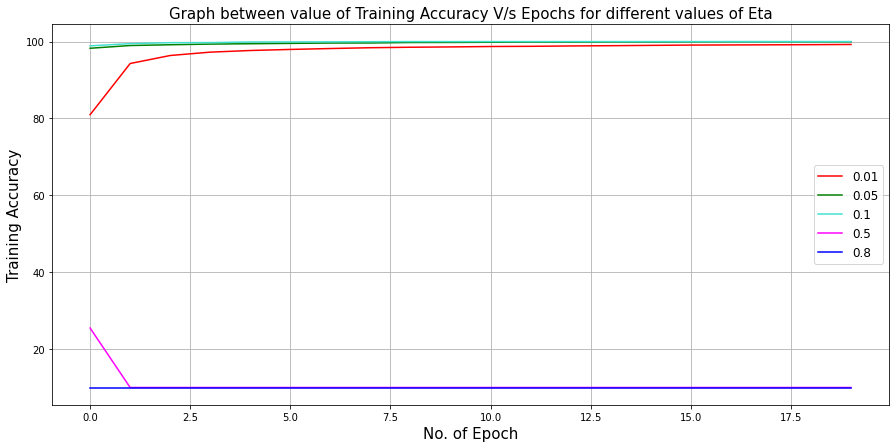

In [ ]:
plt.figure(figsize =(15,7))
colors = ['red','green','turquoise','magenta','blue']
# for i in range(len(val_acc_list)):
#     plt.plot(val_acc_list[i + no_epochs],color = colors[i] )
plt.plot(val_acc_list[0],color = 'red')
plt.plot(val_acc_list[20],color = 'green')
plt.plot(val_acc_list[40],color = 'turquoise')
plt.plot(val_acc_list[60],color = 'magenta')
plt.plot(val_acc_list[80],color = 'blue')
plt.ylabel("Validation Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.001,0.0001,0.00001,0.00001],loc='best',fontsize=12)
plt.title("Graph between value of Validation Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(15,7))
# for i in range(len(train_acc_list)):
#     plt.plot(train_acc_list[i])
plt.plot(train_acc_list[0],color = 'red')
plt.plot(train_acc_list[20],color = 'green')
plt.plot(train_acc_list[40],color = 'turquoise')
plt.plot(train_acc_list[60],color = 'magenta')
plt.plot(train_acc_list[80],color = 'blue')
plt.ylabel("Training Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.001,0.0001,0.00001,0.00001],loc='best',fontsize=12)
plt.title("Graph between value of Training Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

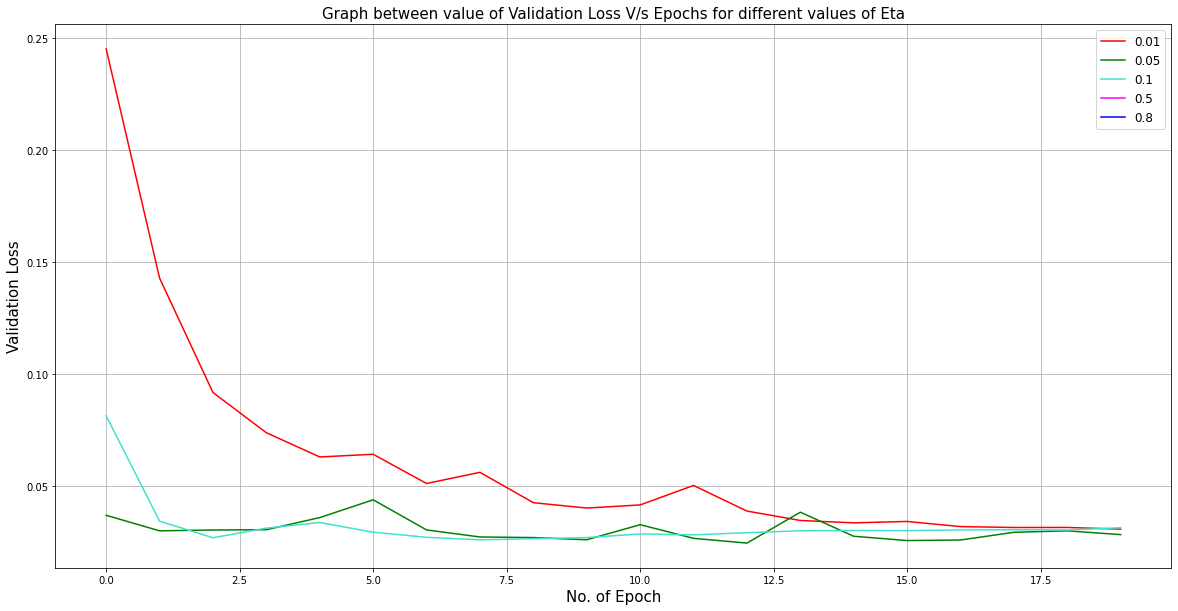



__________________________________________________




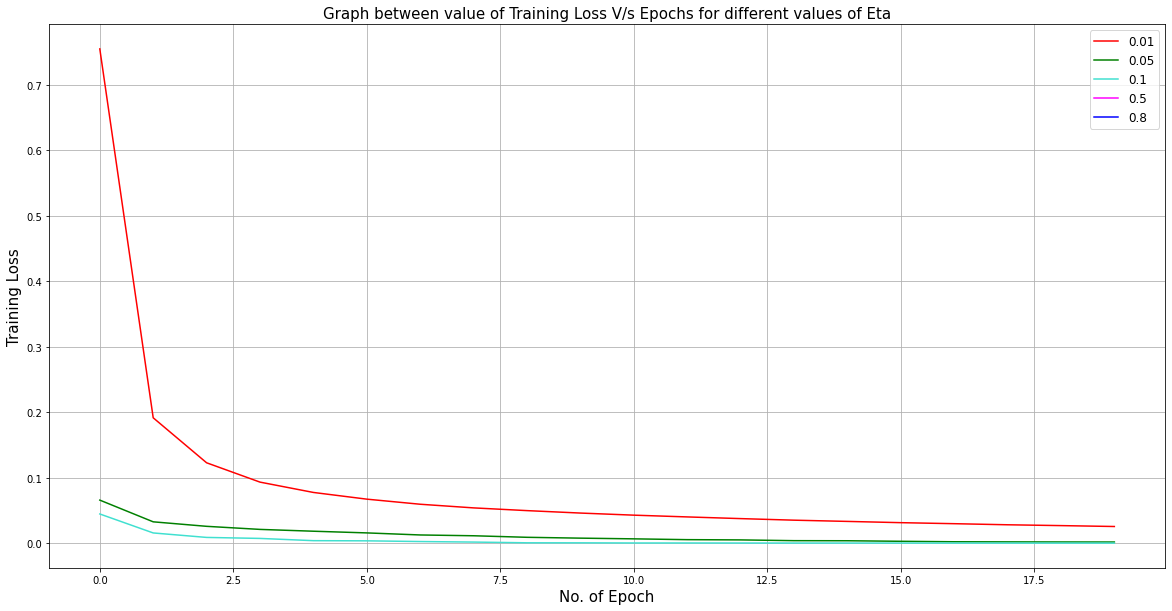

In [ ]:
plt.figure(figsize =(20,10))
# plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
# for i in range(len(val_loss_list)):
#     plt.plot(val_loss_list[i])
plt.plot(val_loss_list[0],color = 'red')
plt.plot(val_loss_list[20],color = 'green')
plt.plot(val_loss_list[40],color = 'turquoise')
plt.plot(val_loss_list[60],color = 'magenta')
plt.plot(val_loss_list[80],color = 'blue')
plt.ylabel("Validation Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(20,10))
# for i in range(len(train_loss_list)):
#     plt.plot(train_loss_list[i],label = "Training Loss")
plt.plot(train_loss_list[0],color = 'red')
plt.plot(train_loss_list[20],color = 'green')
plt.plot(train_loss_list[40],color = 'turquoise')
plt.plot(train_loss_list[60],color = 'magenta')
plt.plot(train_loss_list[80],color = 'blue')
plt.ylabel("Training Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.01,0.05,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

**Best Accuracy when lerning rate value is - 0.05**

###**Chnaging the different values of Momemntum-**

In [ ]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
momentum = [0.001,0.01,0.1,0.5,0.8]
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []
for i in range(len(momentum)):
  print("Calculating for the value of momentum value of  = ",momentum[i],"\n")
  print(dash,"\n")
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05,momentum = momentum[i], weight_decay=0)
  no_epochs = 20
  if (torch.cuda.is_available()):
      model.cuda()


  train_loss = list()
  val_loss = list()
  train_accuracy = list()
  val_accuracy = list()
  best_val_loss = 1
  for epoch in range(no_epochs):
      total_train_loss = 0
      total_val_loss = 0

      model.train()
      total_p = 0
      # training
      for itr, (image, label) in enumerate(train_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          optimizer.zero_grad()

          pred = model(image)

          loss = criterion(pred, label)
          total_train_loss += loss.item()
          #ADDED HERE
          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total_p= total_p + 1        

          loss.backward()
          optimizer.step()
      accuracy_train = (total_p / len(mnist_trainset))*100
      train_accuracy.append(accuracy_train)
      total_train_loss = total_train_loss / (itr + 1)
      train_loss.append(total_train_loss)
      train_acc_list.append(train_accuracy)
      train_loss_list.append(train_loss)

      # validation
      model.eval()
      total = 0
      for itr, (image, label) in enumerate(val_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          pred = model(image)

          loss = criterion(pred, label)
          total_val_loss += loss.item()

          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total = total + 1

      accuracy = (total / len(mnist_valset))*100
      val_accuracy.append(accuracy)

      total_val_loss = total_val_loss / (itr + 1)
      val_loss.append(total_val_loss)
      val_acc_list.append(val_accuracy)
      val_loss_list.append(val_loss)

      print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))
      

Calculating for the value of momentum value of  =  0.001 

________________________________________________________________________

 


Epoch: 1/20, Train Loss: 0.30950918,Train Accuracy: 90.67166667, Val Loss: 0.07844467, Val Accuracy: 97.66666667

Epoch: 2/20, Train Loss: 0.06905564,Train Accuracy: 97.89333333, Val Loss: 0.14243118, Val Accuracy: 95.05555556

Epoch: 3/20, Train Loss: 0.04946456,Train Accuracy: 98.45500000, Val Loss: 0.04360861, Val Accuracy: 98.61111111

Epoch: 4/20, Train Loss: 0.03937605,Train Accuracy: 98.76666667, Val Loss: 0.03793059, Val Accuracy: 98.72222222

Epoch: 5/20, Train Loss: 0.03201072,Train Accuracy: 99.06000000, Val Loss: 0.04702387, Val Accuracy: 98.44444444

Epoch: 6/20, Train Loss: 0.02728478,Train Accuracy: 99.15500000, Val Loss: 0.03295730, Val Accuracy: 98.91111111

Epoch: 7/20, Train Loss: 0.02277665,Train Accuracy: 99.26833333, Val Loss: 0.02964692, Val Accuracy: 98.94444444

Epoch: 8/20, Train Loss: 0.01976280,Train Accuracy: 99.39166667, 

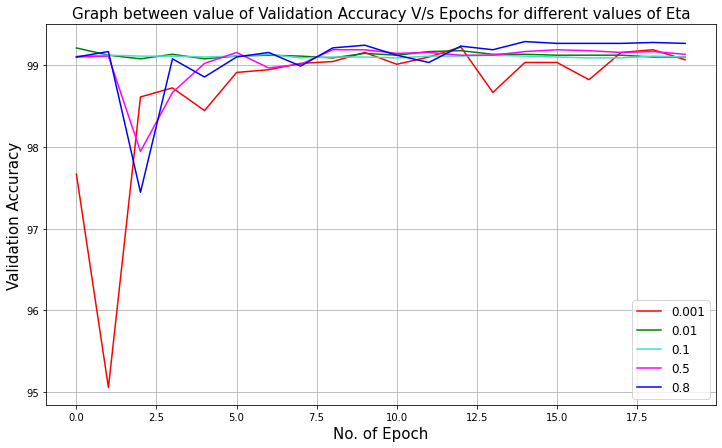



__________________________________________________




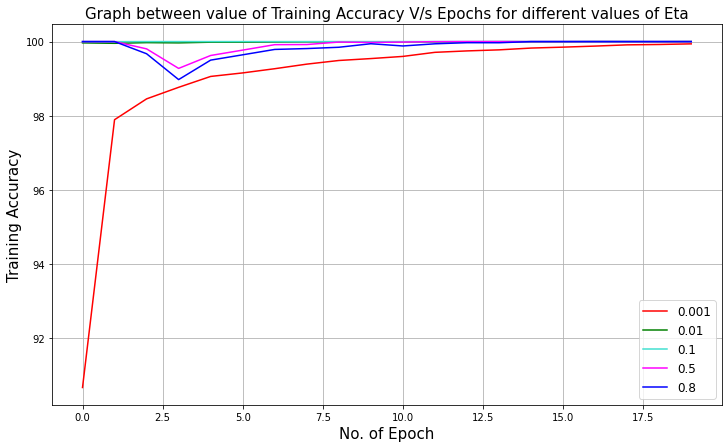

In [ ]:
plt.figure(figsize =(12,7))
# for i in range(len(val_acc_list)):
#     plt.plot(val_acc_list[i])
plt.plot(val_acc_list[0],color = 'red')
plt.plot(val_acc_list[20],color = 'green')
plt.plot(val_acc_list[40],color = 'turquoise')
plt.plot(val_acc_list[60],color = 'magenta')
plt.plot(val_acc_list[80],color = 'blue')
plt.ylabel("Validation Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.001,0.01,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(12,7))
# for i in range(len(train_acc_list)):
#     plt.plot(train_acc_list[i])
plt.plot(train_acc_list[0],color = 'red')
plt.plot(train_acc_list[20],color = 'green')
plt.plot(train_acc_list[40],color = 'turquoise')
plt.plot(train_acc_list[60],color = 'magenta')
plt.plot(train_acc_list[80],color = 'blue')
plt.ylabel("Training Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.001,0.01,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Accuracy V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

#The below graphs are for momentum

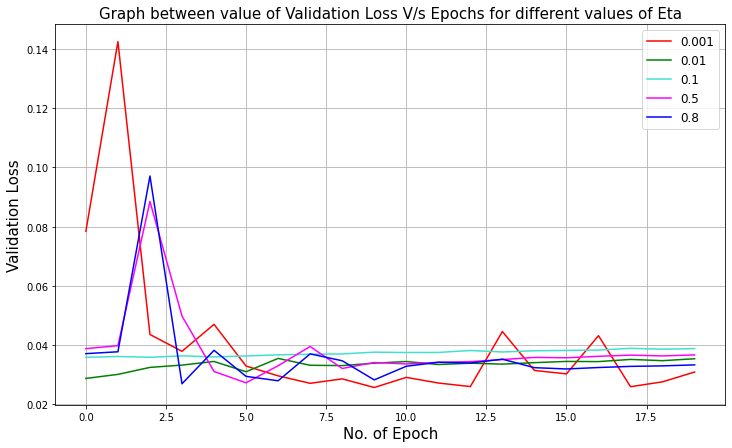



__________________________________________________




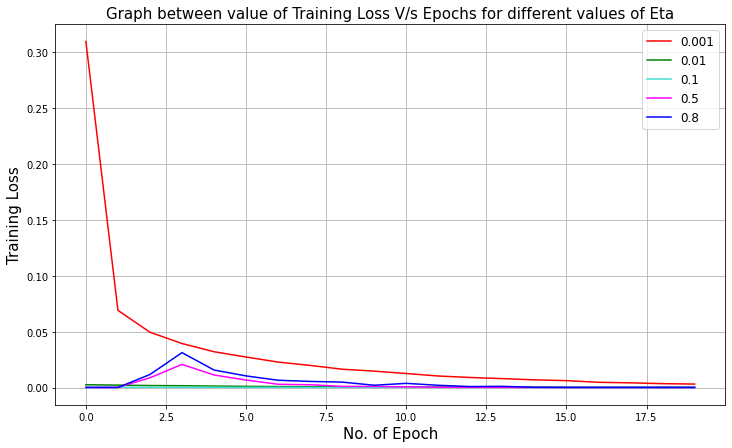

In [ ]:
plt.figure(figsize =(12,7))
# for i in range(len(val_loss_list)):
#     plt.plot(val_loss_list[i])
plt.plot(val_loss_list[0],color = 'red')
plt.plot(val_loss_list[20],color = 'green')
plt.plot(val_loss_list[40],color = 'turquoise')
plt.plot(val_loss_list[60],color = 'magenta')
plt.plot(val_loss_list[80],color = 'blue')
plt.ylabel("Validation Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.001,0.01,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Validation Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(12,7))
# for i in range(len(train_loss_list)):
#     plt.plot(train_loss_list[i],label = "Training Loss")
plt.plot(train_loss_list[0],color = 'red')
plt.plot(train_loss_list[20],color = 'green')
plt.plot(train_loss_list[40],color = 'turquoise')
plt.plot(train_loss_list[60],color = 'magenta')
plt.plot(train_loss_list[80],color = 'blue')
plt.ylabel("Training Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.001,0.01,0.1,0.5,0.8],loc='best',fontsize=12)
plt.title("Graph between value of Training Loss V/s Epochs for different values of Eta",fontsize = 15)
plt.grid()
plt.show()

**Best accuracy when momentum value is = 0.01**

## **Changing the different values of weight decay-**

In [ ]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
wt_decay = [0.0,0.1,0.01,0.001,0.0001]
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []
for i in range(len(wt_decay)):
  print(dash,"\n")
  print("Calculating for the value of weight decay value of  = ",wt_decay[i],"\n")
  print(dash,"\n")
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05,momentum = 0.01, weight_decay = wt_decay[i])
  no_epochs = 20
  if (torch.cuda.is_available()):
      model.cuda()


  train_loss = list()
  val_loss = list()
  train_accuracy = list()
  val_accuracy = list()
  best_val_loss = 1
  for epoch in range(no_epochs):
      total_train_loss = 0
      total_val_loss = 0

      model.train()
      total_p = 0
      # training
      for itr, (image, label) in enumerate(train_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          optimizer.zero_grad()

          pred = model(image)

          loss = criterion(pred, label)
          total_train_loss += loss.item()
          #ADDED HERE
          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total_p= total_p + 1        

          loss.backward()
          optimizer.step()
      accuracy_train = (total_p / len(mnist_trainset))*100
      train_accuracy.append(accuracy_train)
      total_train_loss = total_train_loss / (itr + 1)
      train_loss.append(total_train_loss)
      train_acc_list.append(train_accuracy)
      train_loss_list.append(train_loss)

      # validation
      model.eval()
      total = 0
      for itr, (image, label) in enumerate(val_dataloader):

          if (torch.cuda.is_available()):
              image = image.cuda()
              label = label.cuda()

          pred = model(image)

          loss = criterion(pred, label)
          total_val_loss += loss.item()

          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total = total + 1

      accuracy = (total / len(mnist_valset))*100
      val_accuracy.append(accuracy)

      total_val_loss = total_val_loss / (itr + 1)
      val_loss.append(total_val_loss)
      val_acc_list.append(val_accuracy)
      val_loss_list.append(val_loss)

      print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))
      

________________________________________________________________________

 

Calculating for the value of weight decay value of  =  0.0 

________________________________________________________________________

 


Epoch: 1/20, Train Loss: 0.30416374,Train Accuracy: 90.54333333, Val Loss: 0.13347886, Val Accuracy: 95.56666667

Epoch: 2/20, Train Loss: 0.07300140,Train Accuracy: 97.77833333, Val Loss: 0.05983386, Val Accuracy: 98.26666667

Epoch: 3/20, Train Loss: 0.05123299,Train Accuracy: 98.39833333, Val Loss: 0.05719542, Val Accuracy: 98.12222222

Epoch: 4/20, Train Loss: 0.04009781,Train Accuracy: 98.77333333, Val Loss: 0.03380684, Val Accuracy: 98.83333333

Epoch: 5/20, Train Loss: 0.03224116,Train Accuracy: 98.96000000, Val Loss: 0.03506005, Val Accuracy: 98.85555556

Epoch: 6/20, Train Loss: 0.02768925,Train Accuracy: 99.12000000, Val Loss: 0.02780477, Val Accuracy: 99.10000000

Epoch: 7/20, Train Loss: 0.02291038,Train Accuracy: 99.28833333, Val Loss: 0.04439006, Val Accuracy:

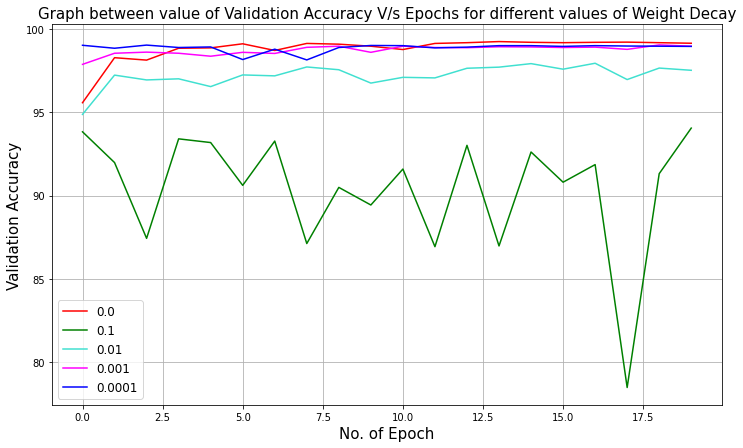



__________________________________________________




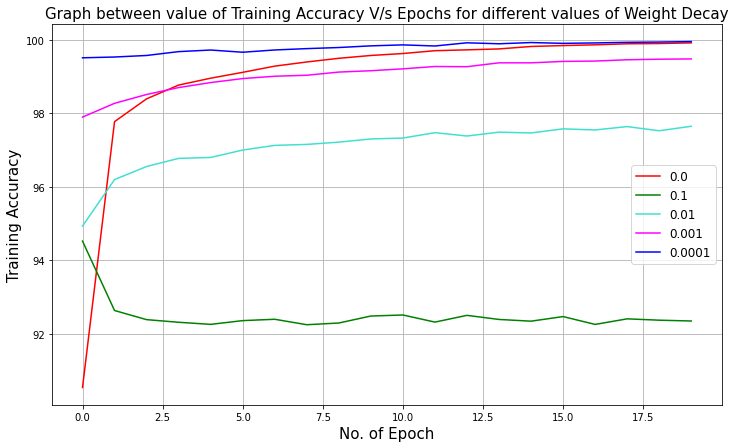

In [ ]:
plt.figure(figsize =(12,7))
# for i in range(len(val_acc_list)):
#     plt.plot(val_acc_list[i])
plt.plot(val_acc_list[0],color = 'red')
plt.plot(val_acc_list[20],color = 'green')
plt.plot(val_acc_list[40],color = 'turquoise')
plt.plot(val_acc_list[60],color = 'magenta')
plt.plot(val_acc_list[80],color = 'blue')
plt.ylabel("Validation Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.0,0.1,0.01,0.001,0.0001],loc='best',fontsize=12)
plt.title("Graph between value of Validation Accuracy V/s Epochs for different values of Weight Decay",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(12,7))
# for i in range(len(train_acc_list)):
#     plt.plot(train_acc_list[i])
plt.plot(train_acc_list[0],color = 'red')
plt.plot(train_acc_list[20],color = 'green')
plt.plot(train_acc_list[40],color = 'turquoise')
plt.plot(train_acc_list[60],color = 'magenta')
plt.plot(train_acc_list[80],color = 'blue')
plt.ylabel("Training Accuracy",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.0,0.1,0.01,0.001,0.0001],loc='best',fontsize=12)
plt.title("Graph between value of Training Accuracy V/s Epochs for different values of Weight Decay",fontsize = 15)
plt.grid()
plt.show()

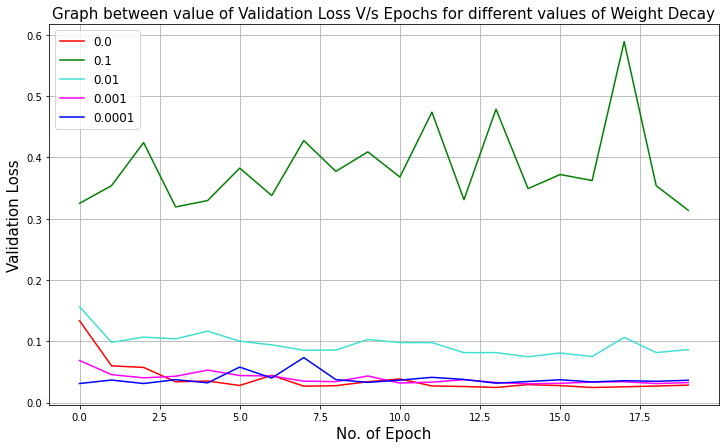



__________________________________________________




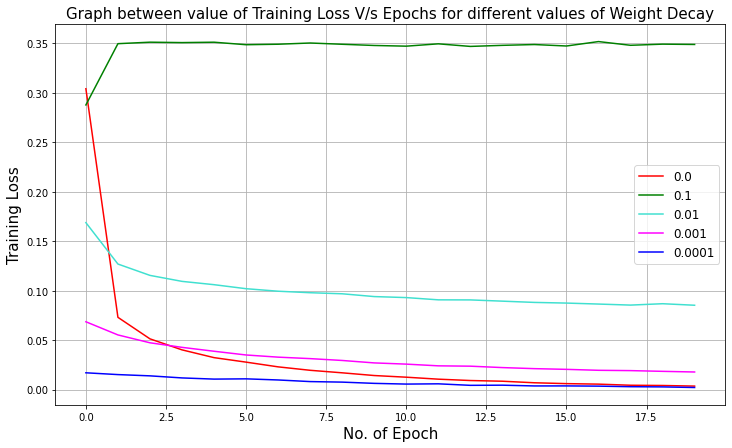

In [ ]:
plt.figure(figsize =(12,7))
# for i in range(len(val_loss_list)):
#     plt.plot(val_loss_list[i])
plt.plot(val_loss_list[0],color = 'red')
plt.plot(val_loss_list[20],color = 'green')
plt.plot(val_loss_list[40],color = 'turquoise')
plt.plot(val_loss_list[60],color = 'magenta')
plt.plot(val_loss_list[80],color = 'blue')
plt.ylabel("Validation Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.0,0.1,0.01,0.001,0.0001],loc='best',fontsize=12)
plt.title("Graph between value of Validation Loss V/s Epochs for different values of Weight Decay",fontsize = 15)
plt.grid()
plt.show()
print("\n\n__________________________________________________\n\n")

plt.figure(figsize =(12,7))
# for i in range(len(train_loss_list)):
#     plt.plot(train_loss_list[i],label = "Training Loss")
plt.plot(train_loss_list[0],color = 'red')
plt.plot(train_loss_list[20],color = 'green')
plt.plot(train_loss_list[40],color = 'turquoise')
plt.plot(train_loss_list[60],color = 'magenta')
plt.plot(train_loss_list[80],color = 'blue')
plt.ylabel("Training Loss",fontsize = 15)
plt.xlabel("No. of Epoch",fontsize = 15)
plt.legend([0.0,0.1,0.01,0.001,0.0001],loc='best',fontsize=12)
plt.title("Graph between value of Training Loss V/s Epochs for different values of Weight Decay",fontsize = 15)
plt.grid()
plt.show()

**The best accuracy is at weight decay of 0.0001**

## **Testing-**

**Now, training the network with the hyperparametres that we got-**

In [10]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d_1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool2d_2 = torch.nn.MaxPool2d(kernel_size=2, stride=1)
        self.linear_1 = torch.nn.Linear(6 * 6 * 256, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d_1(x)
        x = self.conv_3(x)
        x = self.max_pool2d_2(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05,momentum=0.01, weight_decay=0.0001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

The overall model is - 

Model(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max_pool2d_2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=9216, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): ReLU()
)
________________________________________________________________________


Model's state_dict:
conv_1.weight 	 torch.Size([64, 1, 3, 3])
conv_1.bias 	 torch.Size([64])
conv_2.weight 	 torch.Size([128, 64, 3, 3])
conv_2.bias 	 torch.Size([128])
conv_3.weight 	 torch.Size([256, 128, 3, 3])
conv_3.bias 	 torch.Size([256])
linear_1.weight 	 torch.Size(

In [11]:
no_epochs = 20
train_loss = list()
test_loss = list()
train_accuracy = list()
test_accuracy = list()
best_test_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_test_loss = 0

    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total_p= total_p + 1        

        loss.backward()
        optimizer.step()
    accuracy_train = total_p / len(mnist_trainset)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # Testing
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(test_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_test_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_testset)
    test_accuracy.append(accuracy)

    total_test_loss = total_test_loss / (itr + 1)
    test_loss.append(total_test_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Test Loss: {:.8f}, Test Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss,accuracy_train, total_test_loss, accuracy))

    if total_test_loss < best_test_loss:
        best_test_loss = total_test_loss
        print("Saving the model state dictionary for Epoch: {} with  loss: {:.8f}".format(epoch + 1, total_test_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/20, Train Loss: 0.28142478,Train Accuracy: 0.90941667, Test Loss: 0.07347221, Test Accuracy: 0.97700000
Saving the model state dictionary for Epoch: 1 with  loss: 0.07347221

Epoch: 2/20, Train Loss: 0.05202219,Train Accuracy: 0.98375000, Test Loss: 0.03992717, Test Accuracy: 0.98700000
Saving the model state dictionary for Epoch: 2 with  loss: 0.03992717

Epoch: 3/20, Train Loss: 0.03533293,Train Accuracy: 0.98921667, Test Loss: 0.02740849, Test Accuracy: 0.99200000
Saving the model state dictionary for Epoch: 3 with  loss: 0.02740849

Epoch: 4/20, Train Loss: 0.02678413,Train Accuracy: 0.99151667, Test Loss: 0.02870357, Test Accuracy: 0.99000000

Epoch: 5/20, Train Loss: 0.02064975,Train Accuracy: 0.99356667, Test Loss: 0.01745475, Test Accuracy: 0.99500000
Saving the model state dictionary for Epoch: 5 with  loss: 0.01745475

Epoch: 6/20, Train Loss: 0.01674585,Train Accuracy: 0.99483333, Test Loss: 0.02140110, Test Accuracy: 0.99400000

Epoch: 7/20, Train Loss: 0.01299760

In [12]:
pd = TabularFormatTesting(no_epochs,train_loss,train_accuracy,test_loss,test_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Testing loss,Testing Accuracy
0,1,0.281425,0.909417,0.073472,0.977
1,2,0.052022,0.983750,0.039927,0.987
2,3,0.035333,0.989217,0.027408,0.992
3,4,0.026784,0.991517,0.028704,0.990
4,5,0.020650,0.993567,0.017455,0.995
5,6,0.016746,0.994833,0.021401,0.994
6,7,0.012998,0.995917,0.020227,0.996
7,8,0.010950,0.996850,0.017018,0.993
8,9,0.008182,0.997733,0.015093,0.995
9,10,0.006756,0.998267,0.017594,0.997


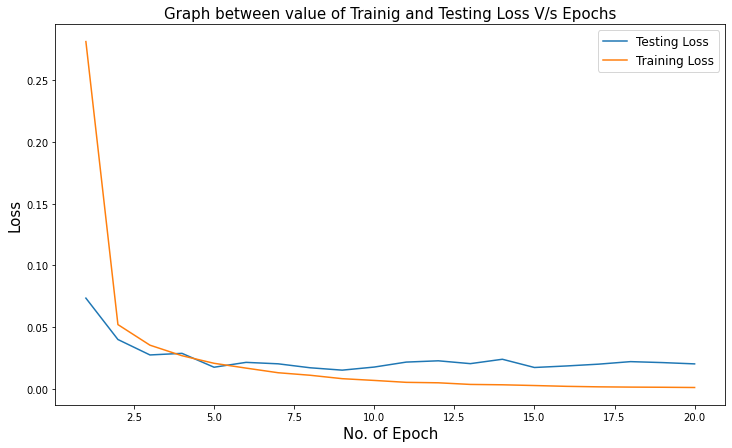



__________________________________________________




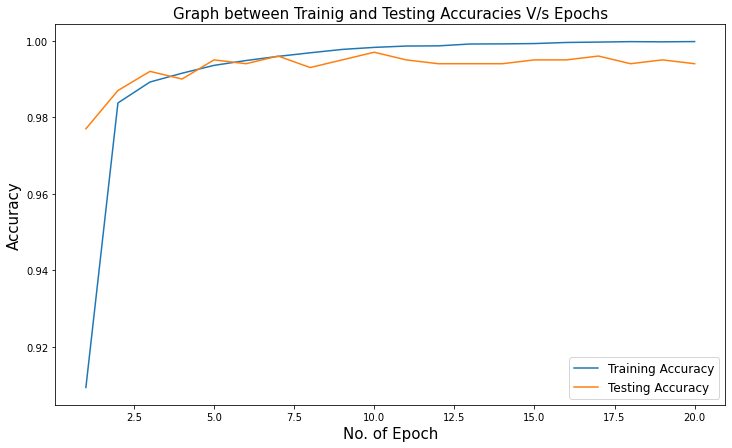

In [13]:
GraphicalFormatTesting(no_epochs,train_loss,train_accuracy,test_loss,test_accuracy)

In [ ]:
img = image[2]
img = img.cuda()
img = img.view(-1, 1, 28, 28)
print(img.shape)

# Since we want to use the already pretrained weights to make some prediction
# we are turning off the gradients
with torch.no_grad():
    logits = model.forward(img)

torch.Size([1, 1, 28, 28])


torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


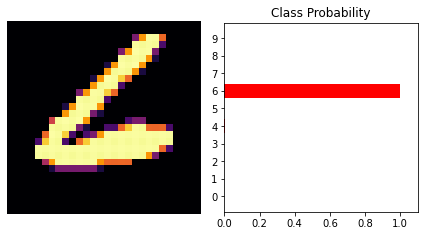

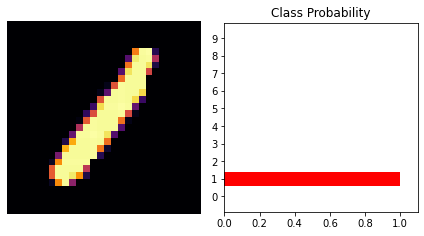

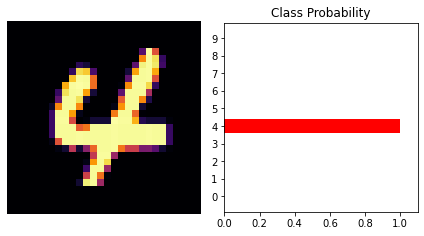

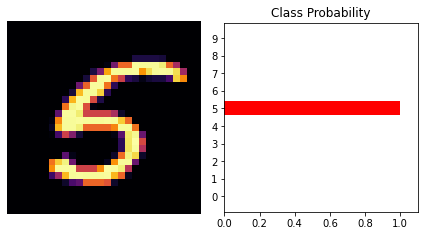

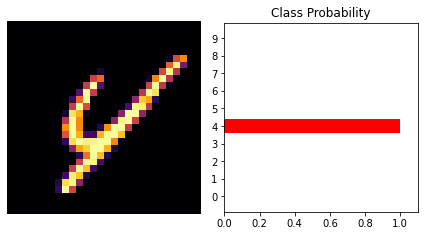

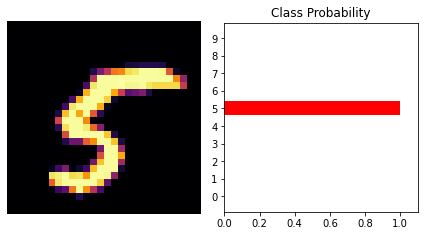

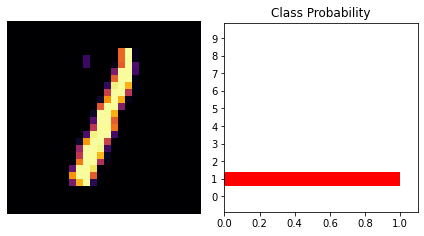

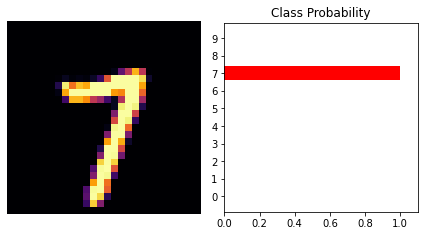

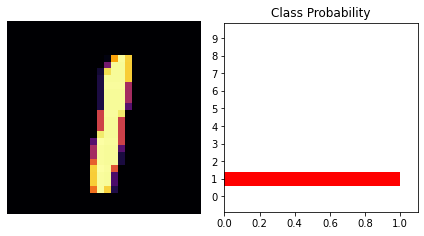

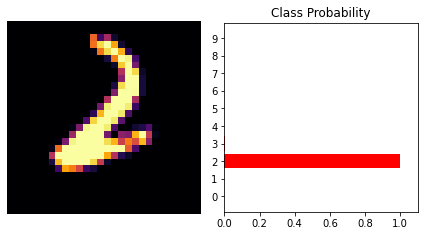

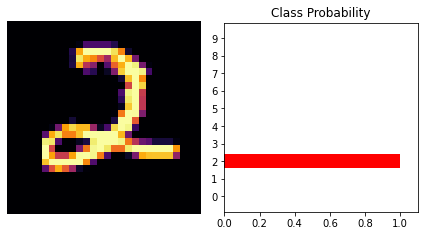

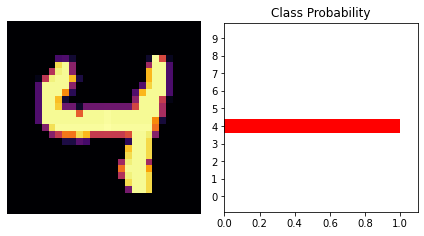

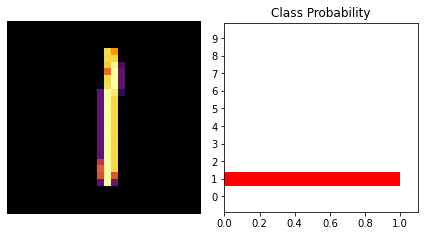

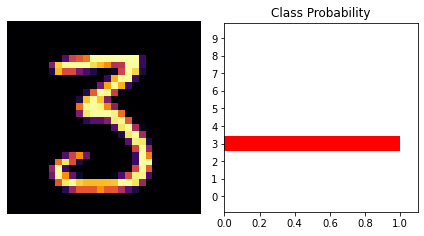

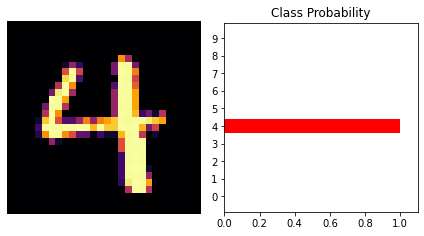

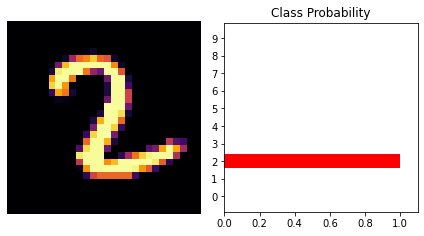

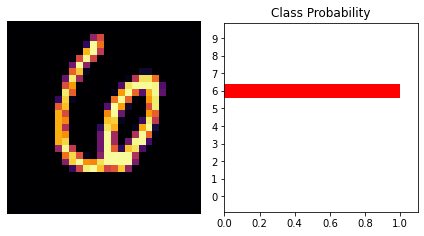

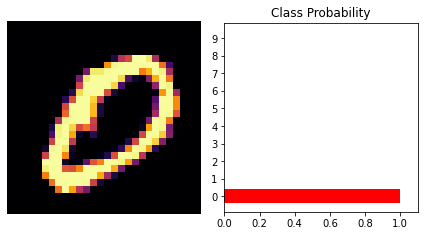

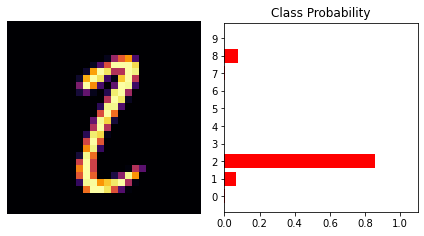

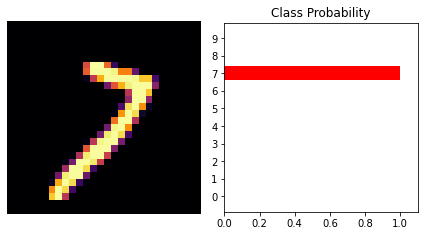

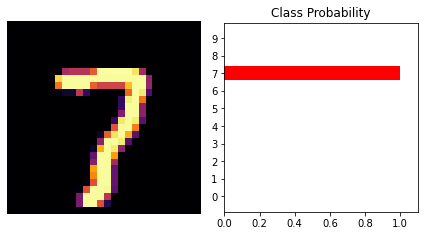

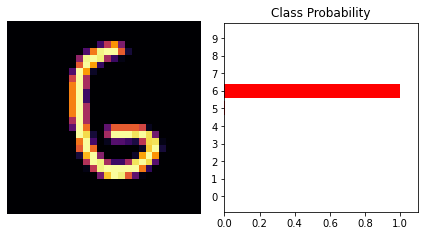

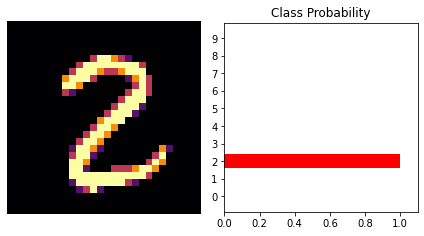

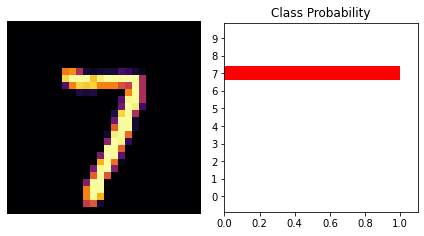

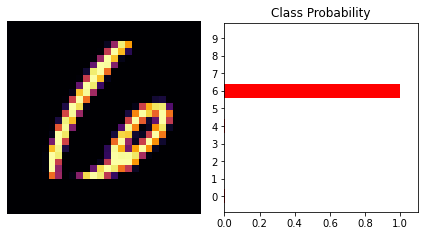

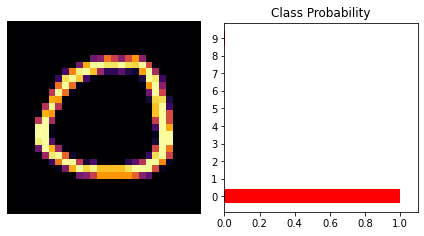

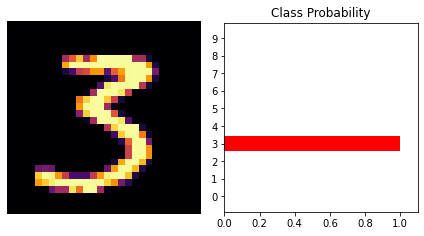

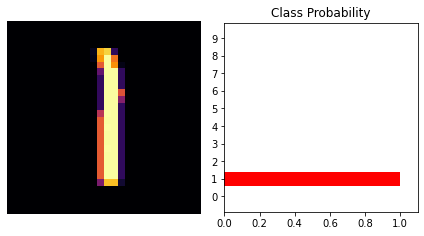

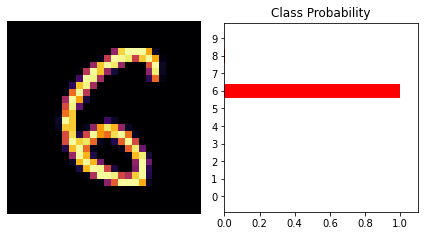

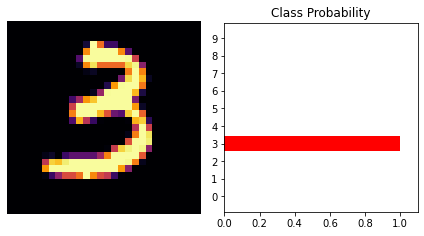

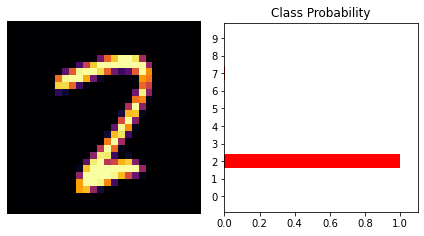

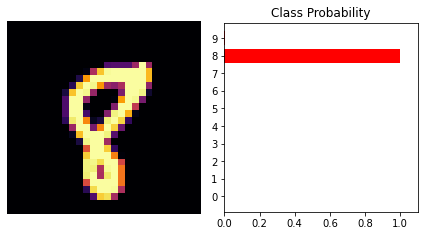

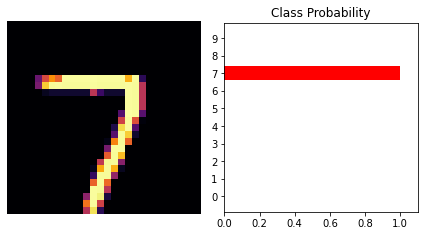

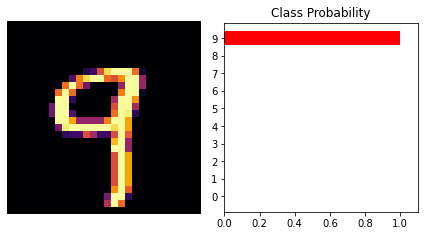

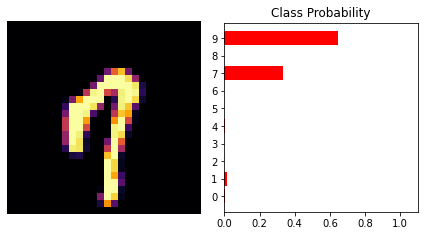

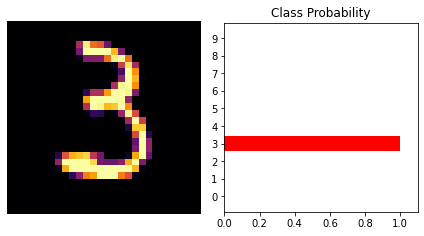

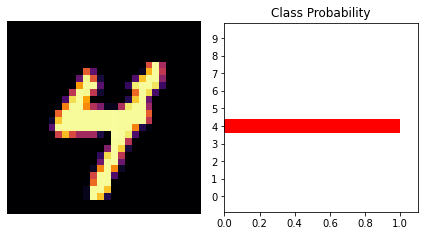

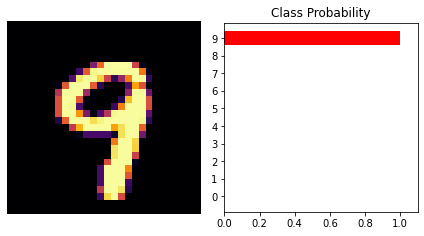

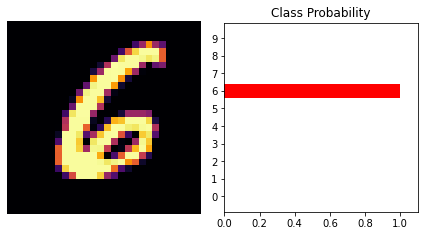

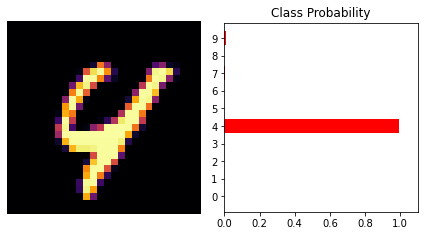

In [ ]:
for i in range(40):
  img = image[i]
  img = img.cuda()
  img = img.view(-1, 1, 28, 28)
  print(img.shape)

  # Since we want to use the already pretrained weights to make some prediction
  # we are turning off the gradients
  with torch.no_grad():
      logits = model.forward(img)
  # We take the softmax for probabilites since our outputs are logits
  probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()

  #print(probabilities)

  fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
  ax1.imshow(img.view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='inferno')
  ax1.axis('off')
  ax2.barh(np.arange(10), probabilities, color='r' )
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(np.arange(10))
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

  plt.tight_layout()